## Business analytics project

The task in this project is to optimize marketing budget for Yandex.Afisha. We will analize users behvior and cohorts, calculate user metrics, research marketing expenses and finally advise marketing experts how to invest and where.

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from functools import reduce
from scipy import stats as st

In [2]:
try:
    visits = pd.read_csv('./datasets/visits_log_us.csv.')
except:
    visits = pd.read_csv('https://code.s3.yandex.net/datasets/visits_log_us.csv')

In [3]:
try:
    orders = pd.read_csv('./datasets/orders_log_us.csv.')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders_log_us.csv')

In [4]:
try:
    costs_us = pd.read_csv('./datasets/costs_us.csv.')
except:
    costs_us = pd.read_csv('https://code.s3.yandex.net/datasets/costs_us.csv')

## Prepare the data.

In [5]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [6]:
visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


In [7]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [8]:
#rename columns
visits.columns=['device','end_ts', 'source_id', 'start_ts', 'uid']

In [9]:
#change columns with the time of the session type to the datetime format
visits[['end_ts', 'start_ts']]=visits[['end_ts', 'start_ts']].apply(pd.to_datetime, format="%Y-%m-%d %H:%M")
#check the result
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [10]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [11]:
orders.describe()

,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
#remane columns
orders.columns=['buy_ts','revenue', 'uid']

In [14]:
#change column type
orders['buy_ts']=pd.to_datetime(orders['buy_ts'])
#check the result
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [15]:
costs_us.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [16]:
costs_us.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [17]:
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [18]:
#change column type
costs_us['dt']=pd.to_datetime(costs_us['dt'])
#check the result
costs_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [19]:
#Check the duplicates
print(visits.duplicated().sum(),
orders.duplicated().sum(),
costs_us.duplicated().sum())

0 0 0


#### Conclusion
We've given of a 3 tables. The one with all the visits contains 359400 rows and 5 columns. The second - with all he orders - containes 50415 rows and 3 columns, the last one with the marketing costs containes 2542 rows and 3 columns. There are no duplicates on our tables, but we've changed columns with dates to a datetime type.

## Let's prepare the data

The main problem is that orders data is not connected with the visits and costs data, we need to fix that!

In [20]:
visits.sample()

,device,end_ts,source_id,start_ts,uid
159179,desktop,2017-06-17 19:23:00,4,2017-06-17 18:15:00,18014241332894316200


In [21]:
#work with date and time of the first visit
first_user_visit = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()

first_user_visit = first_user_visit.merge(visits, on=['uid', 'start_ts'])
first_user_visit = first_user_visit[['uid', 'source_id', 'start_ts']]
first_user_visit.columns = ['uid', 'source_id', 'first_visit_date']
first_user_visit.head()

,uid,source_id,first_visit_date
0,11863502262781,3,2018-03-01 17:27:00
1,49537067089222,2,2018-02-06 15:55:00
2,297729379853735,3,2017-06-07 18:47:00
3,313578113262317,2,2017-09-18 22:49:00
4,325320750514679,5,2017-09-30 14:29:00


In [22]:
#single user can use both types
user_devices = visits.groupby('uid')['device'].count()
user_devices.tail(10)

uid
18446104389491815722    2
18446120301360161958    1
18446156210226471712    7
18446167067214817906    2
18446316582013423015    1
18446403737806311543    1
18446424184725333426    1
18446556406699109058    1
18446621818809592527    2
18446676030785672386    1
Name: device, dtype: int64

In [23]:
#clean the devices data up
user_devices = visits.groupby('uid').agg({'device': lambda col: ' '.join(col)}).reset_index()
user_devices['desktop'] = user_devices['device'].str.contains("desktop")
user_devices['touch'] = user_devices['device'].str.contains("touch")
user_devices = user_devices.drop('device', 1)
user_devices.head()

,uid,desktop,touch
0,11863502262781,False,True
1,49537067089222,False,True
2,297729379853735,True,False
3,313578113262317,True,False
4,325320750514679,True,False


In [24]:
first_order_per_user = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_order_per_user['first_order_month'] = first_order_per_user['buy_ts'].astype('datetime64[M]')
first_order_per_user = first_order_per_user.drop('buy_ts', 1)
first_order_per_user.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In this table the source_id may not be right, cause it's just the current source id. For the further research we will need to add first_source_id, and first_order_month to orders

In [25]:
orders = orders.merge(first_user_visit, on='uid')
orders = orders.merge(first_order_per_user, on='uid')
orders = orders.merge(user_devices, on='uid')
orders.head()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:09:00,2017-06-01,True,False
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:14:00,2017-06-01,True,False
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:25:00,2017-06-01,True,False
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:14:00,2017-06-01,True,False
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:31:00,2017-06-01,True,False


In [26]:
orders_per_month = orders.groupby('first_order_month')['uid'].count()
orders_per_month

first_order_month
2017-06-01    4438
2017-07-01    2910
2017-08-01    2188
2017-09-01    3878
2017-10-01    6005
2017-11-01    5900
2017-12-01    5894
2018-01-01    4308
2018-02-01    4470
2018-03-01    4484
2018-04-01    2690
2018-05-01    3249
2018-06-01       1
Name: uid, dtype: int64

It seems like we have an orders which happened in June 2018 which got here by mistake, I think it will be reasonable to remove it

In [27]:
orders = orders[orders['first_order_month'] != '2018-06-01']
orders_per_month = orders.groupby('first_order_month')['uid'].count()
orders_per_month

first_order_month
2017-06-01    4438
2017-07-01    2910
2017-08-01    2188
2017-09-01    3878
2017-10-01    6005
2017-11-01    5900
2017-12-01    5894
2018-01-01    4308
2018-02-01    4470
2018-03-01    4484
2018-04-01    2690
2018-05-01    3249
Name: uid, dtype: int64

## Product research

### How many people use service per day, week, month

Let's work with dates using visitors dataframe

In [28]:
visits.head()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [29]:
#prepare columns with dates
visits['visit_year']=visits['start_ts'].dt.year
visits['visit_month']=visits['start_ts'].dt.month
visits['visit_week']=visits['start_ts'].dt.isocalendar().week
visits['visit_day']=visits['start_ts'].dt.date
visits.sample(3)

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day
274856,desktop,2017-06-05 03:38:00,1,2017-06-05 02:37:00,4394506233053867282,2017,6,23,2017-06-05
319039,desktop,2017-08-21 10:49:00,3,2017-08-21 10:27:00,568075845860916739,2017,8,34,2017-08-21
324727,desktop,2018-03-22 17:55:00,3,2018-03-22 17:51:00,6834764426337376660,2018,3,12,2018-03-22


In [30]:
visits['visit_year_week']=visits['start_ts'].dt.strftime('%y-%V')
visits['visit_year_month']=visits['start_ts'].dt.strftime('%Y %B')
visits.sample(3)

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day,visit_year_week,visit_year_month
12831,touch,2018-02-19 22:28:00,4,2018-02-19 22:19:00,8288914524288417984,2018,2,8,2018-02-19,18-08,2018 February
106358,desktop,2018-03-26 23:18:00,4,2018-03-26 21:49:00,4028784083651121046,2018,3,13,2018-03-26,18-13,2018 March
295517,desktop,2017-12-11 16:50:00,1,2017-12-11 16:36:00,10528165815050569335,2017,12,50,2017-12-11,17-50,2017 December


#### Total active users

In [31]:
#users per month (the number of monthly active users). 
#since we have data from June 2017 through May 2018 we can group data only by month
mau_total=(
    visits.groupby('visit_month')
    .agg({'uid': 'nunique'})
    .mean()
)
mau_total

uid    23228.416667
dtype: float64

In [32]:
#preparing for plotting graphs
mau = visits.groupby(['visit_year', 'visit_month', 'visit_year_month']).agg({'uid': 'nunique'}).reset_index()
# filtered_mau = mau[['visit_year_month','uid']]
# filtered_mau
mau

,visit_year,visit_month,visit_year_month,uid
0,2017,6,2017 June,13259
1,2017,7,2017 July,14183
2,2017,8,2017 August,11631
3,2017,9,2017 September,18975
4,2017,10,2017 October,29692
5,2017,11,2017 November,32797
6,2017,12,2017 December,31557
7,2018,1,2018 January,28716
8,2018,2,2018 February,28749
9,2018,3,2018 March,27473


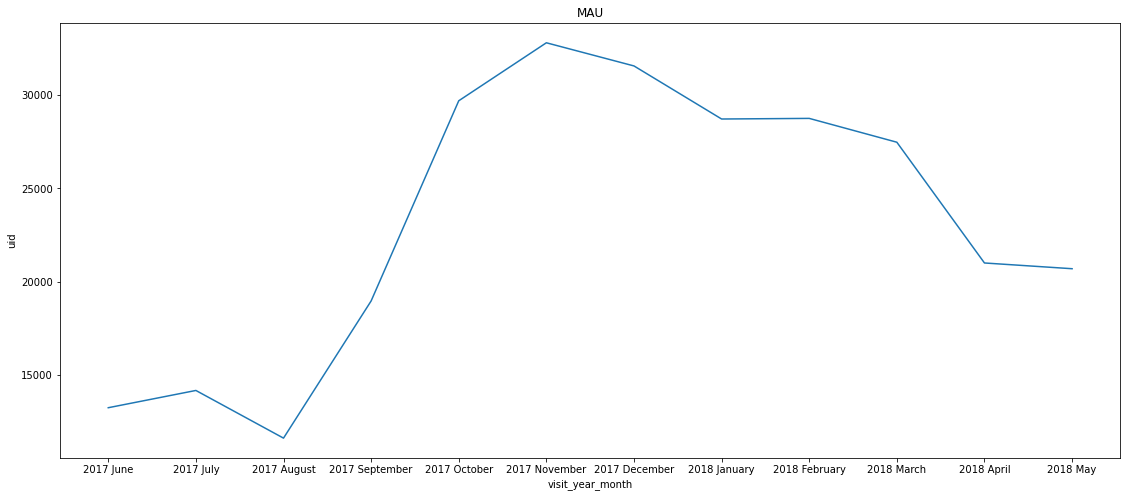

In [33]:
#MAU vizualization
plt.figure(figsize=(19,8))
sns.lineplot(data=mau, x=mau['visit_year_month'], y=mau['uid'])
plt.title('MAU')
plt.show()

In [34]:
#users per week (the number of weekly active users)
wau_total=(
    visits.groupby(['visit_year', 'visit_week'])
    .agg({'uid': 'nunique'})
    .mean()
)
wau_total

uid    5716.245283
dtype: float64

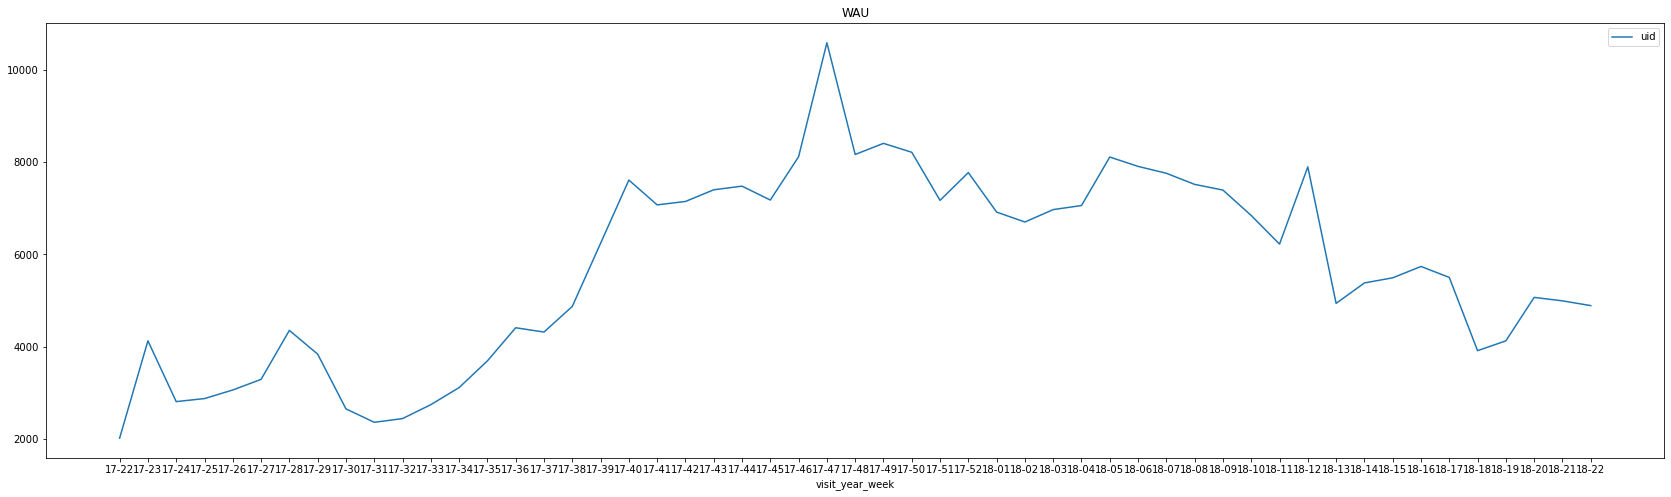

In [35]:
wau = visits.groupby(['visit_year_week']).agg({'uid': 'nunique'})
plt.figure(figsize=(29,8))
plt.title('WAU')
sns.lineplot(data=wau)
plt.show()

In [36]:
#daily active users
dau_total=visits.groupby('visit_day').agg({'uid': 'nunique'}).mean()
dau_total

uid    907.991758
dtype: float64

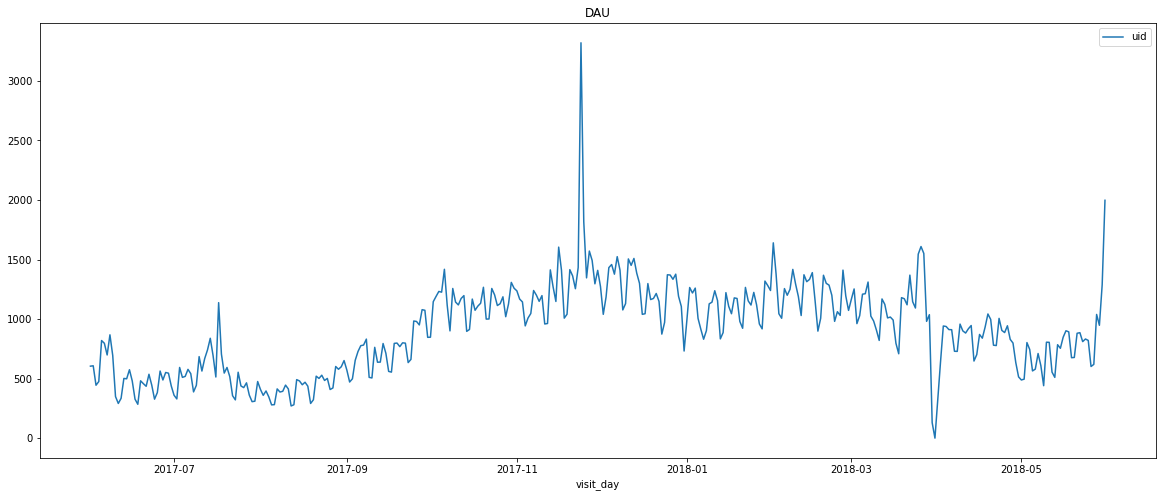

In [37]:
dau = visits.groupby('visit_day').agg({'uid': 'nunique'})
plt.figure(figsize=(20,8))
plt.title('DAU')
sns.lineplot(data=dau)
plt.show()

#### Conclusions
- 23228.42 users use service per month in total. 
- 5716.24 users use service per week in total. 
- 907.99 users use service per day in total.

#### Active users with different devices

In [38]:
visits.head(2)

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day,visit_year_week,visit_year_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,17-51,2017 December
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,18-08,2018 February


In [39]:
#MAU for users with touchscreens
touch_users_mau = (
    visits[visits['device']== 'touch'].groupby(['visit_year','visit_month'])
    .agg({'uid': 'nunique'})
    .mean()
).uid
print(touch_users_mau)

6825.916666666667


In [40]:
#MAU for users with desktops
desktop_users_mau = (
    visits[visits['device']== 'desktop'].groupby(['visit_year','visit_month'])
    .agg({'uid': 'nunique'})
    .mean()
)
desktop_users_mau

uid    16724.916667
dtype: float64

In [41]:
#WAU for users with touchscreens
touch_users_wau = (
    visits[visits['device']== 'touch'].groupby(['visit_year', 'visit_week'])
    .agg({'uid': 'nunique'})
    .mean()
)
touch_users_wau

uid    1634.924528
dtype: float64

In [42]:
#WAU for users with desktops
desktop_users_wau = (
    visits[visits['device']== 'desktop'].groupby(['visit_year', 'visit_week'])
    .agg({'uid': 'nunique'})
    .mean()
)
desktop_users_wau

uid    4129.509434
dtype: float64

In [43]:
touch_dau = visits[visits['device']== 'touch'].groupby('visit_day').agg({'uid': 'nunique'}).mean()
touch_dau

uid    252.873278
dtype: float64

In [44]:
desk_dau = visits[visits['device']== 'desktop'].groupby('visit_day').agg({'uid': 'nunique'}).mean()
desk_dau

uid    659.244505
dtype: float64

#### Conclusions
- 6825.91 users use service per month from touchscreens and 16724.91 use service per month from desktops. 
- 1634.92 users use service per week from touchscreens and 4129.50 users use service per week from desktops. 
- 252.87 users use service per day from touchscreens and 659.244 users use service per day from desktop.

#### Sources

In [45]:
#check the grouping in case I made mistake:)
visits[visits['source_id']== 1].groupby(['visit_year', 'visit_year']).mean()

,,source_id,uid,visit_month,visit_week
visit_year,visit_year,,,,
2017,2017,1.0,9449434981600999424,9.873197,41.137277
2018,2018,1.0,9130738888158046208,2.862595,10.729474


In [46]:
#check unique values in the sourse_id column
sources_id = sorted(visits['source_id'].unique().tolist())
sources_id

[1, 2, 3, 4, 5, 6, 7, 9, 10]

In [47]:
#find MAU for the sources with the function and the loop
def mau_source (i):
    return (
    visits[visits['source_id']== i].groupby(['visit_year','visit_month'])
    .agg({'uid': 'nunique'})
    .mean().uid
    )

In [48]:
#apply function
mau_sources = []
for source in sources_id:
    mau_sources.append({'source': source, 'mau': mau_source(source)})

mau_sources = pd.DataFrame(mau_sources)
mau_sources.sort_values(by='mau')

,source,mau
5,6,1.000000
6,7,2.833333
8,10,707.000000
7,9,987.000000
0,1,1818.750000
1,2,2752.083333
4,5,5017.916667
2,3,6758.833333
3,4,7765.666667


In [49]:
#find WAU for the sources with the function and the loop
def wau_source (i):
    return (
    visits[visits['source_id']== i].groupby(['visit_year','visit_week'])
    .agg({'uid': 'nunique'})
    .mean().uid
    )

wau_sources = []
for source in sources_id:
    wau_sources.append({'source': source, 'wau': wau_source(source)})

wau_sources = pd.DataFrame(wau_sources)
wau_sources.sort_values(by='wau')

,source,wau
5,6,1.000000
6,7,1.333333
8,10,166.547170
7,9,238.698113
0,1,463.490566
1,2,715.716981
4,5,1167.471698
2,3,1565.943396
3,4,1829.283019


In [50]:
#find DAU for the sources with the function and the loop
def dau_source (i):
    return (
    visits[visits['source_id']== i].groupby(['visit_day'])
    .agg({'uid': 'nunique'})
    .mean().uid
    )

dau_sources = []
for source in sources_id:
    dau_sources.append({'source': source, 'dau': dau_source(source)})

dau_sources = pd.DataFrame(dau_sources)
#mau_sources
dau_sources.sort_values(by='dau')

,source,dau
5,6,1.000000
6,7,1.058824
8,10,26.033058
7,9,36.110193
0,1,80.557692
1,2,120.707989
4,5,175.622590
2,3,232.865014
3,4,275.454545


#### Conclusions

Number of users per each source

- Monthly:
1. 6 source	1.000000
2. 7 source	2.833333
3. 10 source	707.000000
4. 9 source	987.000000
5. 1 source	1818.750000
6. 2 source	2752.083333
7. 5 source	5017.916667
8. 3 source	6758.833333
9. 4 source	7765.666667

- Weekly:
1. 6 source	1.000000
2. 7 source	1.333333
3. 10 source	166.547170
4. 4. 9 source 238.698113
5. 1 source	463.490566
6. 2 source	715.716981
7. 5 source	1167.471698
8. 3 source	1565.943396
9. 4 source	1829.283019

- Daily:
1. 6 source	1.000000
2. 7 source	1.058824
3. 10 source	26.033058
4. 9 source	36.110193
5. 1 source	80.557692
6. 2 source	120.707989
7. 5 source	175.622590
8. 3 source 232.86
9. 4 source	275.454545

### Sessions per day

In [51]:
visits.head(3)

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day,visit_year_week,visit_year_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,17-51,2017 December
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,18-08,2018 February
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,17-26,2017 July


In [52]:
#group the data
sessions_per_day=visits.groupby('visit_day')['visit_day'].count()
sessions_per_day.head(5)

visit_day
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
Name: visit_day, dtype: int64

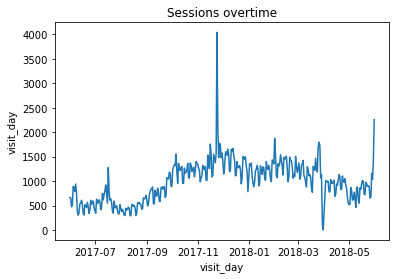

In [53]:
#overtime visualisation 
sns.lineplot(data=sessions_per_day)
plt.title('Sessions overtime')
plt.show()

In [54]:
#quantity of the sessions
sessions_per_day.mean()

987.3626373626373

In [55]:
#calculate unique sessions per day 
unique_visitors_per_day=visits.groupby(['visit_day'])['uid'].nunique()
unique_visitors_per_day.head()

visit_day
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: uid, dtype: int64

#### Sessions per unique user per day

In [56]:
users_per_day = pd.concat([sessions_per_day, unique_visitors_per_day], axis=1)
users_per_day.columns = ['sessions', 'unique_visitors']
users_per_day.reset_index()
users_per_day['sessions_per_user'] = users_per_day['sessions'] / users_per_day['unique_visitors']
users_per_day.head()

,sessions,unique_visitors,sessions_per_user
visit_day,,,
2017-06-01,664,605,1.097521
2017-06-02,658,608,1.082237
2017-06-03,477,445,1.071910
2017-06-04,510,476,1.071429
2017-06-05,893,820,1.089024


### How long are the sessions

#### Sessions duration in total

In [57]:
#session duration
visits['session_duration']= (visits['end_ts'] - visits['start_ts']).dt.seconds
visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day,visit_year_week,visit_year_month,session_duration
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,17-51,2017 December,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,18-08,2018 February,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,17-26,2017 July,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,18-20,2018 May,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,17-52,2017 December,0


##### Let's take a look at session duration distribution

In [58]:
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

It's quite obvoius that there are outliers which are going to ruin our distribution graph, so we should filter them first!

Text(0.5, 1.0, 'Sessions length distribution')

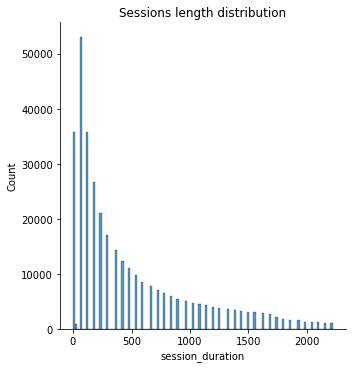

In [59]:
margin = visits['session_duration'].quantile(0.95)

sns.displot(data=visits['session_duration'][visits['session_duration'] < margin])
plt.title('Sessions length distribution')

In [60]:
#let's find average session length (ASL)
asl=visits['session_duration'].mean()
asl

643.506488592098

In [61]:
#let's find mode session length (ASL)
msl=visits['session_duration'].mode().iloc[0]
msl

60

#### Sessions duration for users with different devices 

In [62]:
#ASL for touchscreens
asl_touch = visits[visits['device']=='touch']['session_duration'].mean()
asl_touch

479.6194066072517

In [63]:
#ASL for desktops
asl_desk = visits[visits['device']=='desktop']['session_duration'].mean()
asl_desk

703.9469773429258

#### Sessions duration for users from different sources

In [64]:
#find ASL with the function and the loop
def asl_source (i):
    return (
    visits[visits['source_id']== i]['session_duration'].mean()
    )

for source in sources_id:
    print(source, asl_source(source))

1 1039.3611558864043
2 844.7173182715323
3 573.2837051746292
4 559.8410417116922
5 526.7421866826097
6 1370.0
7 606.6666666666666
9 572.5434962717482
10 662.4438902743142


#### Conclusion
- In average users spent on a platform 643.51 seconds.
- Average session duration for users with touchscreens - 479.62.
- Average session duration for users with desktops - 703.95.
- Average session duration for each source:
1. 1039.3611558864043
2. 844.7173182715323
3. 573.2837051746292
4. 559.8410417116922
5. 526.7421866826097
6. 1370.0
7. 606.6666666666666
9. 572.5434962717482
10. 662.4438902743142

### How often do users come back

In [65]:
#let's find total sticky parameters 
sticky_wau_total = dau_total / wau_total * 100
sticky_mau_total = dau_total / mau_total * 100
print(sticky_wau_total,"\n", sticky_mau_total)

uid    15.884409
dtype: float64 
 uid    3.90897
dtype: float64


In [66]:
#let's find sticky parameters for touchscreen devices
sticky_wau_touch = touch_dau / touch_users_wau * 100
sticky_mau_touch = touch_dau / touch_users_mau * 100
print(sticky_wau_touch,"\n", sticky_mau_touch)

uid    15.46697
dtype: float64 
 uid    3.704605
dtype: float64


In [67]:
#let's find sticky parameters for desktop devices
sticky_wau_desk = desk_dau / desktop_users_wau * 100
sticky_mau_desk = desk_dau / desktop_users_mau * 100
print(sticky_wau_desk,"\n", sticky_mau_desk)

uid    15.964233
dtype: float64 
 uid    3.941691
dtype: float64


#### Conclusion
- Total sticky factor - 15.88 (week), 3.91 (month).
- Sticky parameters for touchscreen devices - 15.47 (week), 3.7 (month)
- Sticky parameters for desktop devices - 15.96 (week), 3.94 (month)

The retention rate will be calculated per month because we have data from the whole year to investigate and because we are dealing with the website, not a mobile application. An application could require more detailed information and quick decisions.

#### Retention rate

In [68]:
#lets find out first visits dates
first_visit_month = visits.groupby(['uid'])['visit_day'].min().astype('datetime64[M]')
first_visit_month.name = 'first_visit_month'
first_visit_month

uid
11863502262781         2018-03-01
49537067089222         2018-02-01
297729379853735        2017-06-01
313578113262317        2017-09-01
325320750514679        2017-09-01
                          ...    
18446403737806311543   2017-11-01
18446424184725333426   2017-12-01
18446556406699109058   2018-01-01
18446621818809592527   2017-12-01
18446676030785672386   2017-10-01
Name: first_visit_month, Length: 228169, dtype: datetime64[ns]

In [69]:
#add first visits to out table
user_activity = visits.join(first_visit_month, on='uid')
user_activity.head(3)

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day,visit_year_week,visit_year_month,session_duration,first_visit_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,17-51,2017 December,1080,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,18-08,2018 February,1680,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,17-26,2017 July,0,2017-07-01


In [70]:
#cohort lifetime
user_activity['cohort_lifetime'] = user_activity['visit_day'].astype('datetime64[M]') - user_activity['first_visit_month']
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime']/np.timedelta64(1, 'M')
user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].round().astype('int')
user_activity.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_day,visit_year_week,visit_year_month,session_duration,first_visit_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,17-51,2017 December,1080,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,18-08,2018 February,1680,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,17-26,2017 July,0,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,18-20,2018 May,1440,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,17-52,2017 December,0,2017-12-01,0


In [71]:
#pivot table
retention_pivot = user_activity.pivot_table(
    index='first_visit_month',
    columns='cohort_lifetime',
    values='uid',
    aggfunc='nunique',
)
retention_pivot.fillna('')

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02-01,22197.0,1267.0,565.0,446.0,,,,,,,,


In [72]:
# plt.figure(figsize=(13, 9))
# plt.title('Retention')
# sns.heatmap(
#     cohorts_retention,
#     annot=True,
#     fmt='.2f',
#     linewidths=1,
#     linecolor='gray',
# ) 
# plt.show()

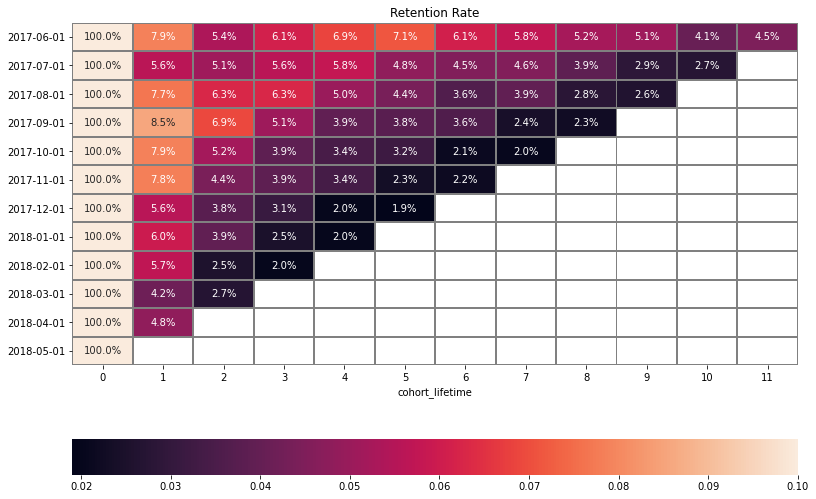

In [73]:
retention = pd.DataFrame()
for col in retention_pivot.columns:
    retention = pd.concat([retention, retention_pivot[col]/retention_pivot[0]], axis=1)
retention.columns = retention_pivot.columns
retention.index = [str(x)[0:10] for x in retention.index]
plt.figure(figsize=(13, 9))
sns.heatmap(retention, annot=True, fmt='.1%', linewidths=1, linecolor='grey',  vmax=0.1, cbar_kws= {'orientation': 'horizontal'} 
            ).set(title = 'Retention Rate')
plt.show()

### Product research conclusion

Total number of users
- 23228.42 users use service per month in total. 
- 5716.24 users use service per week in total. 
- 907.99 users use service per day in total.

Users from different devices overtime
- 6825.91 users use service per month from touchscreens and 16724.91 use service per month from desktops. 
- 1634.92 users use service per week from touchscreens and 4129.50 users use service per week from desktops. 
- 252.87 users use service per day from touchscreens and 659.244 users use service per day from desktop.

Desktop group is larger then touchscreen (wich is not surprise:)

- Total sticky factor - 15.88 (week), 3.91 (month).
- Sticky parameters for touchscreen devices - 15.47 (week), 3.7 (month)
- Sticky parameters for desktop devices - 15.96 (week), 3.94 (month)

This means that almost 16% of the users came back weekly and almost 4% - monthly in total and from different devices, althought desktop sticky factor is a bit higher.

- Source MAU (in acsending order)
6.	1.000000
7.	2.833333
10.	707.000000
9.	987.000000
1.	1818.750000
2.	2752.083333
5.	5017.916667
3.	6758.833333
4.	7765.666667


- Source WAU (in acsending order)
6.	1.000000
7.	1.333333
10.	166.547170
9.	238.698113
1.	463.490566
2.	715.716981
5.	1167.471698
3.	1565.943396
4.	1829.283019

- Source DAU (in acsending order)
6.	1.000000
7.	1.058824
10.	26.033058
9.	36.110193
1.	80.557692
2.	120.707989
5.	175.622590
3.	232.865014
4.	275.454545

## Sales research

### When do people start buying?

In [74]:
orders.head()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:09:00,2017-06-01,True,False
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:14:00,2017-06-01,True,False
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:25:00,2017-06-01,True,False
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:14:00,2017-06-01,True,False
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:31:00,2017-06-01,True,False


In [75]:
#the date of the first order
first_order = orders.groupby('uid')['buy_ts'].min()
first_order.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: buy_ts, dtype: datetime64[ns]

In [76]:
#rename object to aviod mistakes
first_order.name='first_order_date'
first_order.sample()

uid
5206746159564523790   2017-09-23 09:07:00
Name: first_order_date, dtype: datetime64[ns]

In [77]:
#join the data
orders=orders.join(first_order, on='uid', how='left')
orders.head()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch,first_order_date
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:09:00,2017-06-01,True,False,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:25:00,2017-06-01,True,False,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:31:00,2017-06-01,True,False,2017-06-01 07:58:00


In [78]:
#find the date of the first session
first_session = visits.groupby('uid')['start_ts'].min()
first_session.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: start_ts, dtype: datetime64[ns]

In [79]:
first_session.name='first_visit'
first_session.head()

uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_visit, dtype: datetime64[ns]

In [80]:
#add first session to the orders
orders=orders.join(first_session, on='uid', how='left')
orders.tail()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch,first_order_date,first_visit
50409,2018-05-31 23:43:00,3.67,1805512004303848280,2,2017-12-07 23:20:00,2018-05-01,True,False,2018-05-31 23:43:00,2017-12-07 23:20:00
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4,2018-05-31 09:11:00,2018-05-01,True,True,2018-05-31 23:50:00,2018-05-31 09:11:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10,2018-05-31 23:05:00,2018-05-01,True,False,2018-05-31 23:50:00,2018-05-31 23:05:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3,2018-05-31 23:52:00,2018-05-01,True,False,2018-05-31 23:54:00,2018-05-31 23:52:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,3,2017-10-23 12:32:00,2018-05-01,True,False,2018-05-31 23:56:00,2017-10-23 12:32:00


In [81]:
#time between the first visit and the first order
orders['time_before_order'] = orders['first_order_date'] - orders['first_visit']
orders.head()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch,first_order_date,first_visit,time_before_order
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:09:00,2017-06-01,True,False,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:25:00,2017-06-01,True,False,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:31:00,2017-06-01,True,False,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00


#### Determine user's behavior

Let's think about product and people's behaviour. They buy tickets quickly when they know what they want or when they have been searching for something specific for a long time and finally here it is or when they make a decision spontaneously (like "what are we gonna this evening", "let's choose a movie for tonight").
They rarely think for a long time - like when they want to buy tickets as a present for someone else or when they didn't decide yet or something like this.
And some users didn't find what they needed the first time and those who changed their mind or for example didn't find the time and place which fit their conditions (the cinema is too far or the time is too late/early, etc.).

To make sure we're right let's take a look at the statistics and visualize groups let's create a boxplot.

In [82]:
#prepare the column
orders['time_before_order_numeric'] = orders['time_before_order'].dt.total_seconds()/60
orders['time_before_order_numeric'] = orders['time_before_order_numeric'].astype(int)
orders.head()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch,first_order_date,first_visit,time_before_order,time_before_order_numeric
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:09:00,2017-06-01,True,False,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,11
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:25:00,2017-06-01,True,False,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,15
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:31:00,2017-06-01,True,False,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,27


In [83]:
#stats
orders['time_before_order_numeric'].describe()

count     50414.000000
mean      25369.493772
std       66911.370120
min           0.000000
25%           4.000000
50%          22.000000
75%        6231.000000
max      523144.000000
Name: time_before_order_numeric, dtype: float64

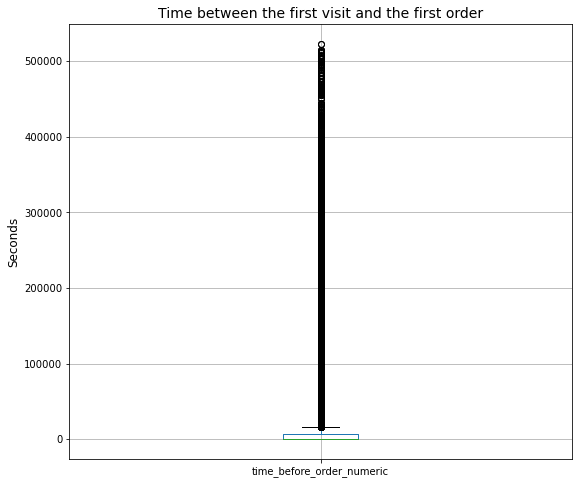

In [84]:
#boxplot will show the distribution of the length of the sessions
orders['time_before_order_numeric'].plot.box(grid='True', figsize=(9,8))
plt.ylabel("Seconds", size=12)
plt.title("Time between the first visit and the first order", size=14)
plt.show()

We were wright. Most of the orders are fast. User opened the service - found what he needs - bought it. Bingo, he got it done in a few minutes.

To determine the groups of users in terms of the speed of the orders carefully I will take a look at the boxplot with sessions length as well.

In [85]:
#stats
visits['session_duration'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration, dtype: float64

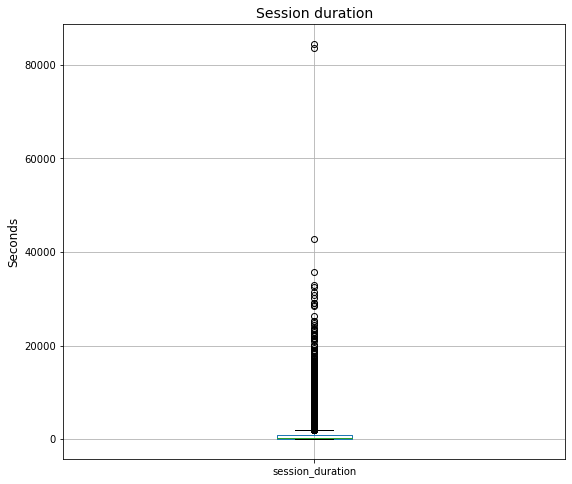

In [86]:
#boxplot
visits['session_duration'].plot.box(grid='True', figsize=(9,8))
plt.ylabel("Seconds", size=12)
plt.title("Session duration", size=14)
plt.show()

#### Conclusion
Average session length is 643 minutes. Most of the users spent on the site about 840 minutes. There is a outliers - users whose sessions are extremely long. May be they just didn't close a tab, may be they forgot it's open.

In average time before the order is 25368 min, but thats because of the outliers. Most users make decisions much faster. 75% of them needs 6231 min to make an order.

### The quantity of the orders 

In [87]:
#get orders in total from info() - 50415
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   buy_ts                     50414 non-null  datetime64[ns] 
 1   revenue                    50414 non-null  float64        
 2   uid                        50414 non-null  uint64         
 3   source_id                  50414 non-null  int64          
 4   first_visit_date           50414 non-null  datetime64[ns] 
 5   first_order_month          50414 non-null  datetime64[ns] 
 6   desktop                    50414 non-null  bool           
 7   touch                      50414 non-null  bool           
 8   first_order_date           50414 non-null  datetime64[ns] 
 9   first_visit                50414 non-null  datetime64[ns] 
 10  time_before_order          50414 non-null  timedelta64[ns]
 11  time_before_order_numeric  50414 non-null  int64      

**From here let's work with cohorts research. For the purposes of the cohorts research I will determine cohorts as a group of users who made an order in particular month.**

In [88]:
#prepare the column
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch,first_order_date,first_visit,time_before_order,time_before_order_numeric
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:09:00,2017-06-01,True,False,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,11
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:25:00,2017-06-01,True,False,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,15
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:31:00,2017-06-01,True,False,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,27


In [89]:
orders['order_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.head()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch,first_order_date,first_visit,time_before_order,time_before_order_numeric,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:09:00,2017-06-01,True,False,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,11,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:25:00,2017-06-01,True,False,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,2,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,15,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:31:00,2017-06-01,True,False,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,27,2017-06-01


In [90]:
#calculating the number of orders
orders_per_month = orders.groupby('order_month').agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
orders_per_month.columns = ['order_month', 'revenue', 'order_quantity']
orders_per_month

,order_month,revenue,order_quantity
0,2017-06-01,9557.49,2023
1,2017-07-01,12539.47,1984
2,2017-08-01,8758.78,1472
3,2017-09-01,18345.51,2750
4,2017-10-01,27987.70,4675
5,2017-11-01,27069.93,4547
6,2017-12-01,36388.60,4942
7,2018-01-01,19417.13,3898
8,2018-02-01,25560.54,4258
9,2018-03-01,28834.59,4181


#### Visualization of orders distibution

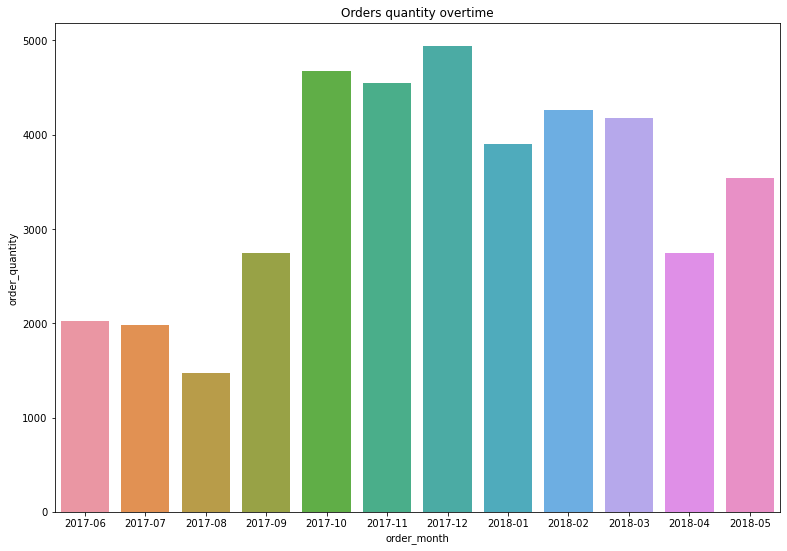

In [91]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('Orders quantity overtime')
sns.barplot(x=orders_per_month['order_month'].dt.to_period('M'), y=orders_per_month['order_quantity']) 
plt.show()

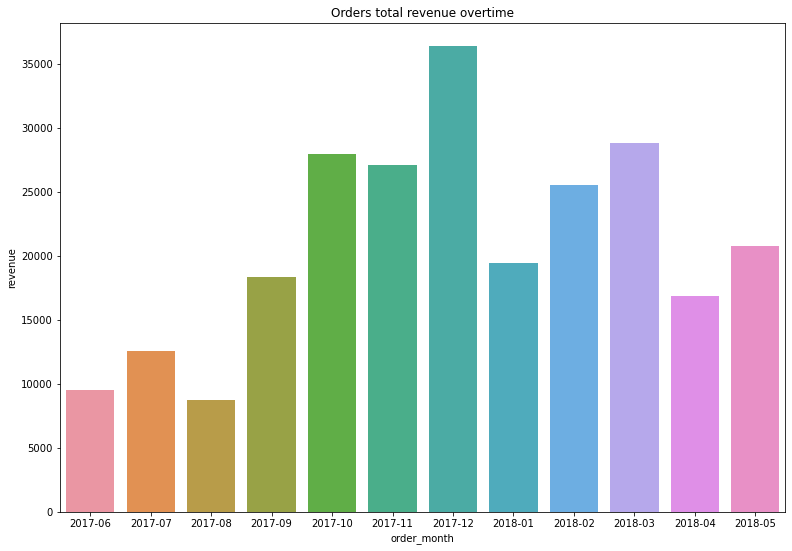

In [92]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('Orders total revenue overtime')
sns.barplot(x=orders_per_month['order_month'].dt.to_period('M'), y=orders_per_month['revenue']) 
plt.show()

In [93]:
#determine cohorts by the month of the first order
orders_grouped_by_cohorts_and_source=orders.groupby(['source_id', 'first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
orders_grouped_by_cohorts_and_source.columns=['source_id' , 'cohort', 'month', 'revenue', 'orders_count']
orders_grouped_by_cohorts_and_source.head()

,source_id,cohort,month,revenue,orders_count
0,1,2017-06-01,2017-06-01,1378.70,190
1,1,2017-06-01,2017-07-01,414.98,16
2,1,2017-06-01,2017-08-01,419.43,10
3,1,2017-06-01,2017-09-01,714.24,9
4,1,2017-06-01,2017-10-01,811.20,12


In [94]:
#calculate cohort's lifetime
orders_grouped_by_cohorts_and_source['lifetime']=(
    orders_grouped_by_cohorts_and_source['month']-orders_grouped_by_cohorts_and_source['cohort'])
orders_grouped_by_cohorts_and_source['lifetime']=orders_grouped_by_cohorts_and_source['lifetime']/np.timedelta64(1, 'M')
orders_grouped_by_cohorts_and_source['lifetime']=orders_grouped_by_cohorts_and_source['lifetime'].round().astype('int')
orders_grouped_by_cohorts_and_source.head(3)

,source_id,cohort,month,revenue,orders_count,lifetime
0,1,2017-06-01,2017-06-01,1378.70,190,0
1,1,2017-06-01,2017-07-01,414.98,16,1
2,1,2017-06-01,2017-08-01,419.43,10,2


In [95]:
#number of cohort users (=cohort sizes)
cohort_sizes=orders.groupby(['first_order_month', 'source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['cohort', 'source_id', 'cohort_size']
cohort_sizes.head()

,cohort,source_id,cohort_size
0,2017-06-01,1,190
1,2017-06-01,2,235
2,2017-06-01,3,638
3,2017-06-01,4,413
4,2017-06-01,5,384


In [96]:
#add cohort size to the orders
orders_grouped_by_cohorts_and_source=orders_grouped_by_cohorts_and_source.merge(cohort_sizes, on=['cohort', 'source_id'])
orders_grouped_by_cohorts_and_source

,source_id,cohort,month,revenue,orders_count,lifetime,cohort_size
0,1,2017-06-01,2017-06-01,1378.70,190,0,190
1,1,2017-06-01,2017-07-01,414.98,16,1,190
2,1,2017-06-01,2017-08-01,419.43,10,2,190
3,1,2017-06-01,2017-09-01,714.24,9,3,190
4,1,2017-06-01,2017-10-01,811.20,12,4,190
...,...,...,...,...,...,...,...
510,10,2018-03-01,2018-03-01,638.44,186,0,186
511,10,2018-03-01,2018-04-01,12.71,5,1,186
512,10,2018-03-01,2018-05-01,6.29,3,2,186
513,10,2018-04-01,2018-04-01,261.93,107,0,107


### Orders per client

In [97]:
total_clients = len(orders.groupby('uid').nunique())
total_orders = len(orders)

orders_per_client = total_orders / total_clients
orders_per_client

1.3803734735228081

Each customer within presented dataset made 1.3803 orders on average

### Average purchase

#### In total

In [98]:
 #total average purchase
orders['revenue'].mean()

4.999678263974174

#### By cohorts

In [99]:
#orders_grouped_by_cohorts_and_source['cumulative_revenue'] = orders_grouped_by_cohorts_and_source.groupby(['source_id', 'cohort', 'lifetime'])['revenue'].sum().groupby(level=[0,1]).cumsum().reset_index()['revenue']
orders_grouped_by_cohorts_and_source.head()

,source_id,cohort,month,revenue,orders_count,lifetime,cohort_size
0,1,2017-06-01,2017-06-01,1378.70,190,0,190
1,1,2017-06-01,2017-07-01,414.98,16,1,190
2,1,2017-06-01,2017-08-01,419.43,10,2,190
3,1,2017-06-01,2017-09-01,714.24,9,3,190
4,1,2017-06-01,2017-10-01,811.20,12,4,190


In [100]:
orders_grouped_by_cohorts_and_source['cumulative_revenue'] = orders_grouped_by_cohorts_and_source.groupby(['source_id', 'cohort', 'lifetime'])['revenue'].sum().groupby(level=[0,1]).cumsum().reset_index()['revenue']
orders_grouped_by_cohorts_and_source.head()

,source_id,cohort,month,revenue,orders_count,lifetime,cohort_size,cumulative_revenue
0,1,2017-06-01,2017-06-01,1378.70,190,0,190,1378.70
1,1,2017-06-01,2017-07-01,414.98,16,1,190,1793.68
2,1,2017-06-01,2017-08-01,419.43,10,2,190,2213.11
3,1,2017-06-01,2017-09-01,714.24,9,3,190,2927.35
4,1,2017-06-01,2017-10-01,811.20,12,4,190,3738.55


In [101]:
orders_grouped = orders_grouped_by_cohorts_and_source.groupby(['cohort', 'month']).agg({'revenue': 'sum', 'orders_count': 'sum'}).reset_index()
orders_grouped['revenue_per_user']=orders_grouped['revenue'] / orders_grouped['orders_count']
orders_grouped['cumulative_revenue'] = orders_grouped.groupby(['cohort', 'month'])['revenue'].sum().groupby(level=0).cumsum().reset_index()['revenue']

orders_grouped.sample(3) 

,cohort,month,revenue,orders_count,revenue_per_user,cumulative_revenue
30,2017-08-01,2018-03-01,554.86,44,12.610455,10948.40
67,2018-01-01,2018-05-01,211.48,45,4.699556,16663.13
55,2017-11-01,2018-04-01,219.88,48,4.580833,25629.97


In [102]:
#calculate cohort's lifetime
orders_grouped['lifetime']=(
    orders_grouped['month']-orders_grouped['cohort'])
orders_grouped['lifetime']=orders_grouped['lifetime']/np.timedelta64(1, 'M')
orders_grouped['lifetime']=orders_grouped['lifetime'].round().astype('int')
orders_grouped.head()

,cohort,month,revenue,orders_count,revenue_per_user,cumulative_revenue,lifetime
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,9557.49,0
1,2017-06-01,2017-07-01,981.82,61,16.095410,10539.31,1
2,2017-06-01,2017-08-01,885.34,50,17.706800,11424.65,2
3,2017-06-01,2017-09-01,1931.30,54,35.764815,13355.95,3
4,2017-06-01,2017-10-01,2068.58,88,23.506591,15424.53,4


In [103]:
cohort_sizes = orders_grouped[orders_grouped['lifetime'] == 0]
cohort_sizes = cohort_sizes[['cohort', 'orders_count']]
cohort_sizes.columns = ['cohort', 'cohort_size']
cohort_sizes

,cohort,cohort_size
0,2017-06-01,2023
12,2017-07-01,1923
23,2017-08-01,1370
33,2017-09-01,2581
42,2017-10-01,4340
50,2017-11-01,4081
57,2017-12-01,4383
63,2018-01-01,3373
68,2018-02-01,3651
72,2018-03-01,3533


In [104]:
orders_grouped = orders_grouped.merge(cohort_sizes, on='cohort')
orders_grouped.head()

,cohort,month,revenue,orders_count,revenue_per_user,cumulative_revenue,lifetime,cohort_size
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,9557.49,0,2023
1,2017-06-01,2017-07-01,981.82,61,16.095410,10539.31,1,2023
2,2017-06-01,2017-08-01,885.34,50,17.706800,11424.65,2,2023
3,2017-06-01,2017-09-01,1931.30,54,35.764815,13355.95,3,2023
4,2017-06-01,2017-10-01,2068.58,88,23.506591,15424.53,4,2023


In [105]:
#calculate revenue per user per month
revenue_per_user_per_month=orders_grouped.pivot_table(
    index='cohort',
    columns='month',
    values='revenue_per_user',
    aggfunc='mean',
) 
revenue_per_user_per_month

month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
cohort,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026


In [106]:
revenue_per_user_per_month=orders_grouped.pivot_table(
    index='cohort',
    columns='lifetime',
    values='revenue_per_user',
    aggfunc='mean',
) 
revenue_per_user_per_month

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151
2017-07-01,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN,NaN
2017-09-01,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN,NaN,NaN
2017-10-01,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN,NaN,NaN,NaN
2017-11-01,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,8.721228,12.365542,11.199767,4.699556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,8.610000,4.942414,6.941026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualization (heatmap)

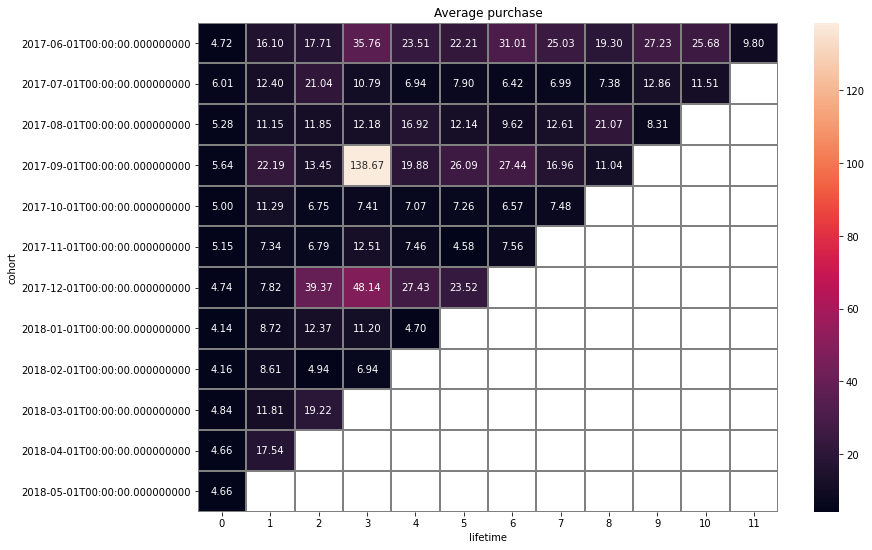

In [107]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('Average purchase')
sns.heatmap(
    revenue_per_user_per_month,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

#### Conclusion
The hot season for service is autumn and especially winter. This is pretty logic because people buy tickets for holidays - for themselves or as presents, parents have to entertain kids during New Years Eve and scary Russian winter. The weather is not pleasant, but you still have to do something in your free time.

The average purchase is almost 5$ in total. But in general the longer cohort "lives" the bigger the purchase.

Something extremely good happened in December with the September cohort. It purchased the biggest amount of money - almost 140.

So far the June and September cohorts have the biggest average purchases.

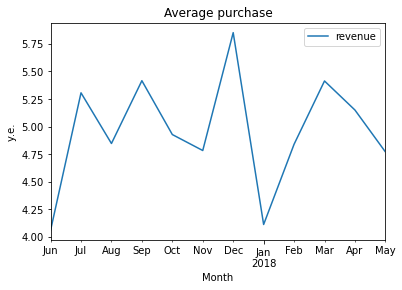

In [108]:
orders.pivot_table(index='order_month', values='revenue', aggfunc='mean').plot().set(title = 'Average purchase', xlabel = 'Month', ylabel = 'у.е.')
plt.show()

### LTV per each cohort

- In general LTV = gross proft / number of buyers
- In our case gross profit = total revenue of each cohort
- Number of buyers = number of unique uid's in each cohort

#### In total

In [109]:
orders_grouped['ltv']=orders_grouped['cumulative_revenue']/orders_grouped['cohort_size']
orders_grouped.head()

,cohort,month,revenue,orders_count,revenue_per_user,cumulative_revenue,lifetime,cohort_size,ltv
0,2017-06-01,2017-06-01,9557.49,2023,4.724414,9557.49,0,2023,4.724414
1,2017-06-01,2017-07-01,981.82,61,16.095410,10539.31,1,2023,5.209743
2,2017-06-01,2017-08-01,885.34,50,17.706800,11424.65,2,2023,5.647380
3,2017-06-01,2017-09-01,1931.30,54,35.764815,13355.95,3,2023,6.602051
4,2017-06-01,2017-10-01,2068.58,88,23.506591,15424.53,4,2023,7.624582


In [110]:
#prepare LTV report
orders_grouped['ltv']=orders_grouped['cumulative_revenue']/orders_grouped['cohort_size']
ltv_report=orders_grouped.pivot_table(index='cohort', columns='lifetime', values='ltv', aggfunc='mean')
ltv_report

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,4.724414,5.209743,5.647380,6.602051,7.624582,8.360084,9.310524,9.892116,10.445329,11.051117,11.622378,11.879234
2017-07-01,6.010218,6.345429,6.968960,7.327936,7.504727,7.660775,7.780983,7.922803,8.084035,8.231180,8.386854,NaN
2017-08-01,5.276518,5.748511,6.206993,6.598270,7.092321,7.375861,7.586526,7.991533,8.283745,8.471723,NaN,NaN
2017-09-01,5.644529,6.762115,7.283045,11.258838,11.659396,12.306463,13.008071,13.251220,13.435227,NaN,NaN,NaN
2017-10-01,5.003733,5.539495,5.730889,5.888035,6.039594,6.159956,6.244772,6.360242,NaN,NaN,NaN,NaN
2017-11-01,5.154683,5.553916,5.753472,6.078424,6.226437,6.280316,6.395244,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.738191,4.998565,5.923662,6.988937,7.301866,7.639913,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.135636,4.430394,4.734675,4.877453,4.940151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.156987,4.435262,4.513777,4.587921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualization

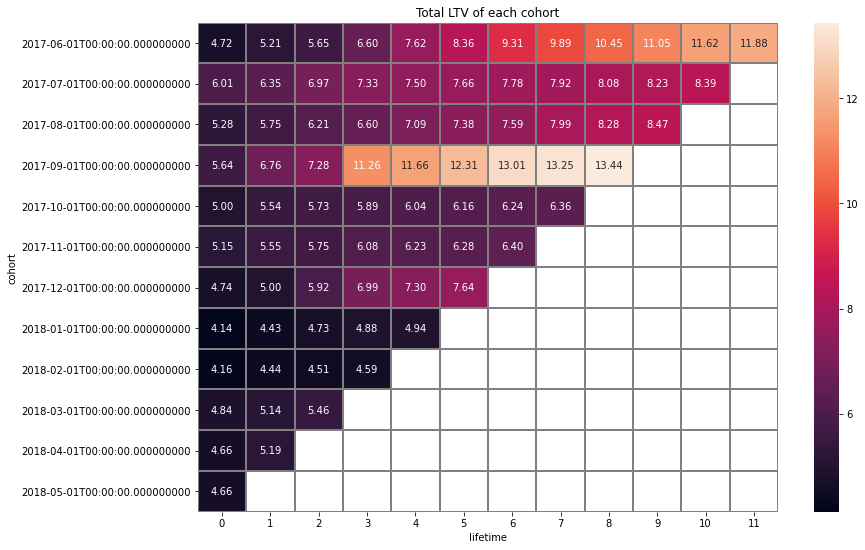

In [111]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('Total LTV of each cohort')
sns.heatmap(
    ltv_report,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

Cohorts keep bringing money for their whole life. Some of them even grow and have a peak around hot season (like the first cohort).

#### For different devices

In [112]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   buy_ts                     50414 non-null  datetime64[ns] 
 1   revenue                    50414 non-null  float64        
 2   uid                        50414 non-null  uint64         
 3   source_id                  50414 non-null  int64          
 4   first_visit_date           50414 non-null  datetime64[ns] 
 5   first_order_month          50414 non-null  datetime64[ns] 
 6   desktop                    50414 non-null  bool           
 7   touch                      50414 non-null  bool           
 8   first_order_date           50414 non-null  datetime64[ns] 
 9   first_visit                50414 non-null  datetime64[ns] 
 10  time_before_order          50414 non-null  timedelta64[ns]
 11  time_before_order_numeric  50414 non-null  int64      

In [113]:
orders_time=orders['buy_ts']
orders_time.head()

0   2017-06-01 00:10:00
1   2017-06-01 00:25:00
2   2017-06-01 00:27:00
3   2017-06-01 00:29:00
4   2017-06-01 07:58:00
Name: buy_ts, dtype: datetime64[ns]

##### Desktop users

In [114]:
desktop_users = orders[orders['desktop']==True]
desktop_users.head()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch,first_order_date,first_visit,time_before_order,time_before_order_numeric,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:09:00,2017-06-01,True,False,2017-06-01 00:10:00,2017-06-01 00:09:00,0 days 00:01:00,1,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:25:00,2017-06-01 00:14:00,0 days 00:11:00,11,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:25:00,2017-06-01,True,False,2017-06-01 00:27:00,2017-06-01 00:25:00,0 days 00:02:00,2,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:14:00,2017-06-01,True,False,2017-06-01 00:29:00,2017-06-01 00:14:00,0 days 00:15:00,15,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:31:00,2017-06-01,True,False,2017-06-01 07:58:00,2017-06-01 07:31:00,0 days 00:27:00,27,2017-06-01


In [115]:
desktop_users_cohorts = desktop_users.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'})
desktop_users_cohorts = desktop_users_cohorts.reset_index()
desktop_users_cohorts.columns = ['cohort', 'month', 'revenue', 'orders_count']
desktop_users_cohorts.head()

,cohort,month,revenue,orders_count
0,2017-06-01,2017-06-01,8621.38,1765
1,2017-06-01,2017-07-01,887.49,54
2,2017-06-01,2017-08-01,867.31,47
3,2017-06-01,2017-09-01,1931.30,54
4,2017-06-01,2017-10-01,2061.37,86


In [116]:
desktop_users_cohorts['lifetime']=(
    desktop_users_cohorts['month']-desktop_users_cohorts['cohort'])
desktop_users_cohorts['lifetime']=desktop_users_cohorts['lifetime']/np.timedelta64(1, 'M')
desktop_users_cohorts['lifetime']=desktop_users_cohorts['lifetime'].round().astype('int')
desktop_users_cohorts.head(3)

,cohort,month,revenue,orders_count,lifetime
0,2017-06-01,2017-06-01,8621.38,1765,0
1,2017-06-01,2017-07-01,887.49,54,1
2,2017-06-01,2017-08-01,867.31,47,2


In [117]:
desktop_users_cohorts['cumulative_revenue'] = desktop_users_cohorts.groupby(['cohort', 'month'])['revenue'].sum().groupby(level=0).cumsum().reset_index()['revenue']
desktop_users_cohorts['revenue_per_user'] = (desktop_users_cohorts['revenue']
    / desktop_users_cohorts['orders_count']) 
desktop_users_cohorts.tail()

,cohort,month,revenue,orders_count,lifetime,cumulative_revenue,revenue_per_user
73,2018-03-01,2018-04-01,1038.00,82,1,15244.50,12.658537
74,2018-03-01,2018-05-01,1047.65,49,2,16292.15,21.380612
75,2018-04-01,2018-04-01,9047.27,1916,0,9047.27,4.721957
76,2018-04-01,2018-05-01,1192.13,64,1,10239.40,18.627031
77,2018-05-01,2018-05-01,11706.19,2430,0,11706.19,4.817362


In [118]:
desktop_cohort_size=desktop_users.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
desktop_cohort_size.columns=['cohort', 'number_of_buyers']
desktop_cohort_size

,cohort,number_of_buyers
0,2017-06-01,1765
1,2017-07-01,1601
2,2017-08-01,1170
3,2017-09-01,2152
4,2017-10-01,3703
5,2017-11-01,3512
6,2017-12-01,3668
7,2018-01-01,2788
8,2018-02-01,2971
9,2018-03-01,2925


In [119]:
desktop_users_cohorts['ltv']=desktop_users_cohorts['cumulative_revenue']/orders_grouped['cohort_size']
desktop_users_cohorts.head()

,cohort,month,revenue,orders_count,lifetime,cumulative_revenue,revenue_per_user,ltv
0,2017-06-01,2017-06-01,8621.38,1765,0,8621.38,4.884635,4.261681
1,2017-06-01,2017-07-01,887.49,54,1,9508.87,16.435000,4.700381
2,2017-06-01,2017-08-01,867.31,47,2,10376.18,18.453404,5.129105
3,2017-06-01,2017-09-01,1931.30,54,3,12307.48,35.764815,6.083777
4,2017-06-01,2017-10-01,2061.37,86,4,14368.85,23.969419,7.102743


In [120]:
ltv_report_desktop=desktop_users_cohorts.pivot_table(
    index='cohort', columns='lifetime', values='ltv', aggfunc='mean')
ltv_report_desktop

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,4.261681,4.700381,5.129105,6.083777,7.102743,7.837187,8.787627,9.369219,9.920015,10.525348,11.092684,11.342897
2017-07-01,5.110270,5.409641,6.026188,6.360889,6.524399,6.670889,6.780614,6.911388,7.068362,7.215507,7.367363,NaN
2017-08-01,4.594328,5.053336,5.500715,5.884168,6.372153,6.651058,6.839328,7.231891,7.513489,7.694328,NaN,NaN
2017-09-01,4.951902,6.019419,6.534552,10.507803,10.904669,11.542890,12.243483,12.482515,12.665382,NaN,NaN,NaN
2017-10-01,4.403795,4.891283,5.071081,5.222090,5.365864,5.481267,5.562528,5.676039,NaN,NaN,NaN,NaN
2017-11-01,4.312428,4.701267,4.894443,5.217253,5.356839,5.409907,5.522139,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.075923,4.312870,5.231360,6.289065,6.599710,6.934488,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,3.463943,3.743543,4.041666,4.173448,4.233516,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,3.443974,3.700879,3.775023,3.846256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


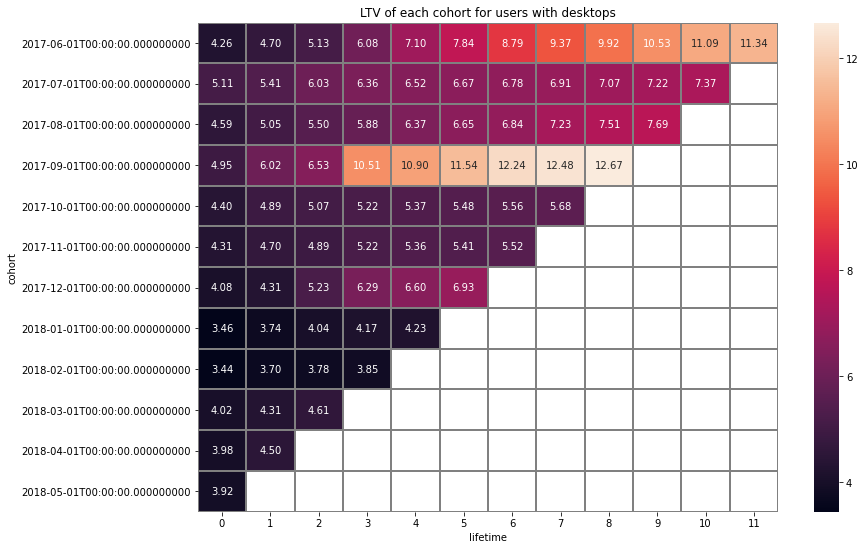

In [121]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('LTV of each cohort for users with desktops')
sns.heatmap(
    ltv_report_desktop,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

##### Touchscreen users

In [122]:
touch_users = orders[orders['touch']==True]
touch_users.head()

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch,first_order_date,first_visit,time_before_order,time_before_order_numeric,order_month
8,2017-06-01 09:22:00,1.22,3644482766749211722,1,2017-06-01 09:22:00,2017-06-01,True,True,2017-06-01 09:22:00,2017-06-01 09:22:00,0 days,0,2017-06-01
9,2017-06-02 12:44:00,0.85,3644482766749211722,1,2017-06-01 09:22:00,2017-06-01,True,True,2017-06-01 09:22:00,2017-06-01 09:22:00,0 days,0,2017-06-01
10,2017-06-02 15:08:00,12.83,3644482766749211722,1,2017-06-01 09:22:00,2017-06-01,True,True,2017-06-01 09:22:00,2017-06-01 09:22:00,0 days,0,2017-06-01
11,2017-06-04 13:06:00,17.11,3644482766749211722,1,2017-06-01 09:22:00,2017-06-01,True,True,2017-06-01 09:22:00,2017-06-01 09:22:00,0 days,0,2017-06-01
12,2017-06-07 11:06:00,7.33,3644482766749211722,1,2017-06-01 09:22:00,2017-06-01,True,True,2017-06-01 09:22:00,2017-06-01 09:22:00,0 days,0,2017-06-01


In [123]:
touch_users_cohorts=touch_users.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
touch_users_cohorts.columns = ['cohort', 'month', 'revenue', 'orders_count']
touch_users_cohorts.head()

,cohort,month,revenue,orders_count
0,2017-06-01,2017-06-01,1899.82,454
1,2017-06-01,2017-07-01,285.77,19
2,2017-06-01,2017-08-01,148.52,16
3,2017-06-01,2017-09-01,218.05,10
4,2017-06-01,2017-10-01,1009.23,21


In [124]:
touch_users_cohorts['lifetime']=(
    touch_users_cohorts['month']-touch_users_cohorts['cohort'])
touch_users_cohorts['lifetime']=touch_users_cohorts['lifetime']/np.timedelta64(1, 'M')
touch_users_cohorts['lifetime']=touch_users_cohorts['lifetime'].round().astype('int')
touch_users_cohorts.head(3)

,cohort,month,revenue,orders_count,lifetime
0,2017-06-01,2017-06-01,1899.82,454,0
1,2017-06-01,2017-07-01,285.77,19,1
2,2017-06-01,2017-08-01,148.52,16,2


In [125]:
touch_users_cohorts['cumulative_revenue'] = touch_users_cohorts.groupby(['cohort', 'month'])['revenue'].sum().groupby(level=0).cumsum().reset_index()['revenue']
touch_users_cohorts['revenue_per_user'] = (touch_users_cohorts['revenue']
    / touch_users_cohorts['orders_count']) 
touch_users_cohorts.head()

,cohort,month,revenue,orders_count,lifetime,cumulative_revenue,revenue_per_user
0,2017-06-01,2017-06-01,1899.82,454,0,1899.82,4.184626
1,2017-06-01,2017-07-01,285.77,19,1,2185.59,15.040526
2,2017-06-01,2017-08-01,148.52,16,2,2334.11,9.282500
3,2017-06-01,2017-09-01,218.05,10,3,2552.16,21.805000
4,2017-06-01,2017-10-01,1009.23,21,4,3561.39,48.058571


In [126]:
touch_cohort_size=touch_users.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
touch_cohort_size.columns=['cohort', 'number_of_buyers']
touch_cohort_size

,cohort,number_of_buyers
0,2017-06-01,454
1,2017-07-01,520
2,2017-08-01,325
3,2017-09-01,646
4,2017-10-01,1005
5,2017-11-01,981
6,2017-12-01,1099
7,2018-01-01,817
8,2018-02-01,974
9,2018-03-01,879


In [127]:
touch_cohort_size=touch_users_cohorts.merge(touch_cohort_size, on='cohort')
touch_cohort_size.head()

,cohort,month,revenue,orders_count,lifetime,cumulative_revenue,revenue_per_user,number_of_buyers
0,2017-06-01,2017-06-01,1899.82,454,0,1899.82,4.184626,454
1,2017-06-01,2017-07-01,285.77,19,1,2185.59,15.040526,454
2,2017-06-01,2017-08-01,148.52,16,2,2334.11,9.282500,454
3,2017-06-01,2017-09-01,218.05,10,3,2552.16,21.805000,454
4,2017-06-01,2017-10-01,1009.23,21,4,3561.39,48.058571,454


In [128]:
touch_cohort_size['ltv']=touch_cohort_size['cumulative_revenue']/touch_cohort_size['number_of_buyers']
touch_cohort_size.head()

,cohort,month,revenue,orders_count,lifetime,cumulative_revenue,revenue_per_user,number_of_buyers,ltv
0,2017-06-01,2017-06-01,1899.82,454,0,1899.82,4.184626,454,4.184626
1,2017-06-01,2017-07-01,285.77,19,1,2185.59,15.040526,454,4.814075
2,2017-06-01,2017-08-01,148.52,16,2,2334.11,9.282500,454,5.141211
3,2017-06-01,2017-09-01,218.05,10,3,2552.16,21.805000,454,5.621498
4,2017-06-01,2017-10-01,1009.23,21,4,3561.39,48.058571,454,7.844471


In [129]:
ltv_report_touch=touch_cohort_size.pivot_table(
    index='cohort', columns='lifetime', values='ltv', aggfunc='mean')
ltv_report_touch

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,4.184626,4.814075,5.141211,5.621498,7.844471,8.656630,9.575617,9.945374,10.461211,10.948172,11.250749,11.911322
2017-07-01,6.583885,7.048827,7.968058,8.703615,9.036923,9.217442,9.309058,9.498000,9.933346,10.321250,10.462365,NaN
2017-08-01,5.427692,5.818646,6.145754,6.371785,6.792400,7.089015,7.223815,7.527200,8.148585,8.473754,NaN,NaN
2017-09-01,6.020108,7.787012,8.785031,9.423700,10.116734,10.391765,11.740759,11.997353,12.164907,NaN,NaN,NaN
2017-10-01,5.329831,6.228697,6.356627,6.466557,6.615184,6.734657,6.775443,6.912259,NaN,NaN,NaN,NaN
2017-11-01,6.374679,6.857421,7.069694,7.687319,7.923221,7.986901,8.032926,NaN,NaN,NaN,NaN,NaN
2017-12-01,4.146333,4.312739,4.429973,4.527571,4.567252,4.614877,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,4.422069,4.593574,4.724468,5.055679,5.098923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,4.125051,4.417279,4.458388,4.497146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


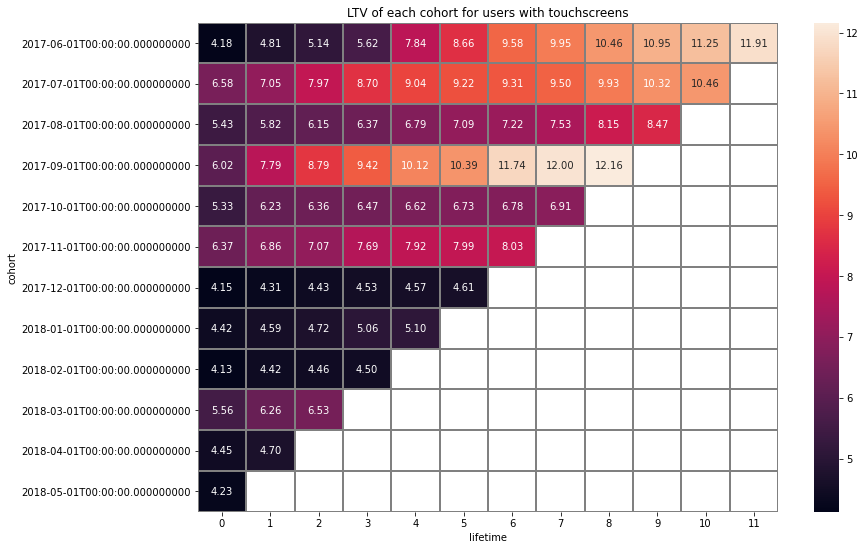

In [130]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('LTV of each cohort for users with touchscreens')
sns.heatmap(
    ltv_report_touch,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

There is a difference between purchases from desktops and touchscreens. Seems like desktop users pay more. Maybe, people make small simple orders from their phones. Like "Let's go to the movie right now" and not something like "next week our class is going to the theatre, we have to buy 30 tickets" or "I wanna go to the opera/famous singer/pop star next month". 

#### Intersection of the touchscreen and desktop users

In [131]:
desktop_users = visits[visits['device'] == 'desktop']['uid'].drop_duplicates()
touch_users = visits[visits['device'] == 'touch']['uid'].drop_duplicates()
intersection = pd.Series(list(set(desktop_users).intersection(set(touch_users))))

intersection_touch_to_desktop = len(intersection) / len(touch_users)
intersection_desktop_to_touch = len(intersection) / len(desktop_users)

print('Touchscreen to desktop',intersection_touch_to_desktop)
print('Desktop to touchscreen', intersection_desktop_to_touch)

Touchscreen to desktop 0.10791225734108907
Desktop to touchscreen 0.04679588872072598


Users who start to interact with the system on the desktop tend to continue on the desktop as well, while touchscreen users have a slightly bigger tendency to migrate to the desktop.

#### For different sources

In [132]:
#We heave 9 sources, so I'm gonna use function (wish me luck, please:)
from matplotlib import pyplot as plt

def heatmap_for_source (i, df):
    df_i = df[df['source_id']==i]
    df_i_cohorts = df_i.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'})
    df_i_cohorts = df_i_cohorts.reset_index()
    df_i_cohorts['lifetime'] = df_i_cohorts['order_month'] - df_i_cohorts['first_order_month']
    df_i_cohorts['lifetime'] = df_i_cohorts['lifetime']/np.timedelta64(1, 'M')
    df_i_cohorts['lifetime'] = df_i_cohorts['lifetime'].round().astype('int')
    df_i_cohorts['cumulative_revenue'] = df_i_cohorts.groupby(['first_order_month', 'order_month'])['revenue'].sum().groupby(level=0).cumsum().reset_index()['revenue']
    df_i_cohorts['revenue_per_user'] = (df_i_cohorts['revenue'] / df_i_cohorts['uid']) 
    df_i_cohort_size = df_i.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
    df_i_cohort_size.columns = ['first_order_month', 'number_of_buyers']
    df_i_cohort_size_ = df_i_cohorts.merge(df_i_cohort_size, on='first_order_month')
    df_i_cohort_size_['ltv'] = df_i_cohort_size_['cumulative_revenue']/df_i_cohort_size_['number_of_buyers']
    df_i_ltv_report = df_i_cohort_size_.pivot_table(index='first_order_month', columns='lifetime', values='ltv', aggfunc='mean')
    report_len = len(df_i_ltv_report)
    if report_len > 0:
        plt.figure(figsize=(13, 9))
        plt.title('LTV of source {}'.format(i))
        sns.heatmap(
            df_i_ltv_report,
            annot=True,
            fmt='.2f',
            linewidths=1,
            linecolor='gray',) 
        plt.show()

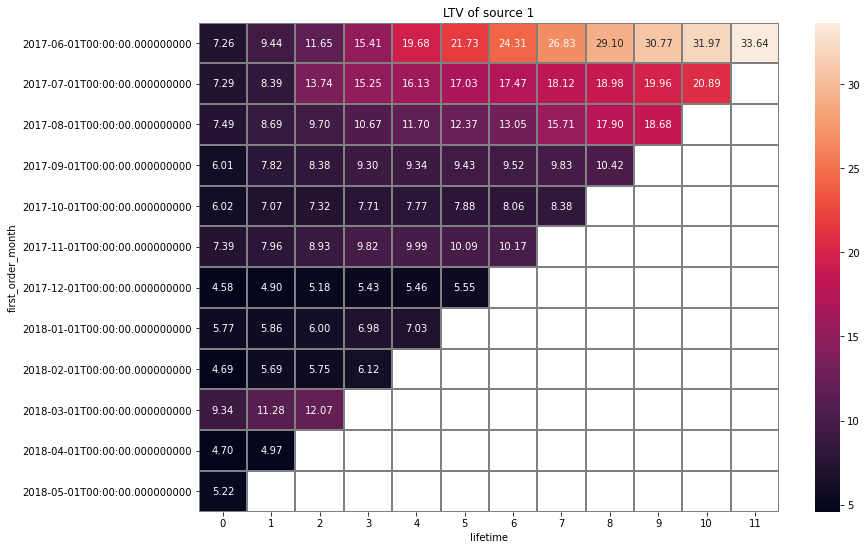

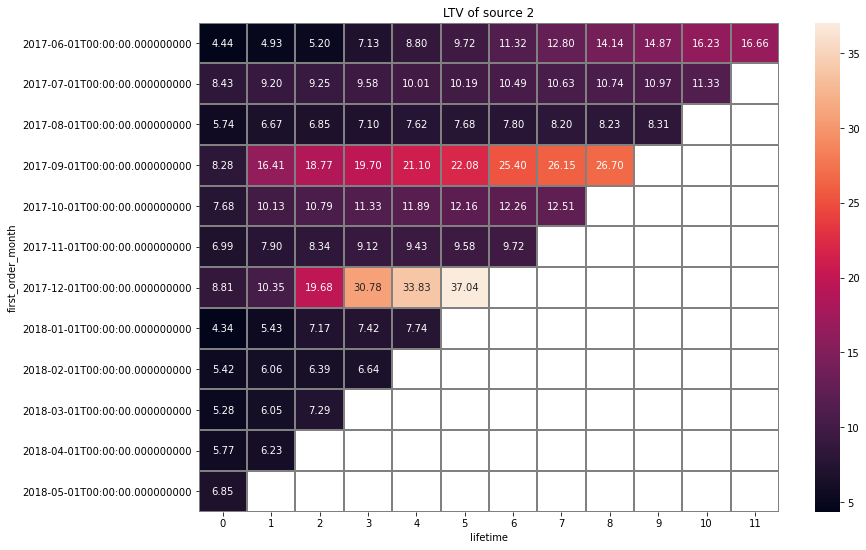

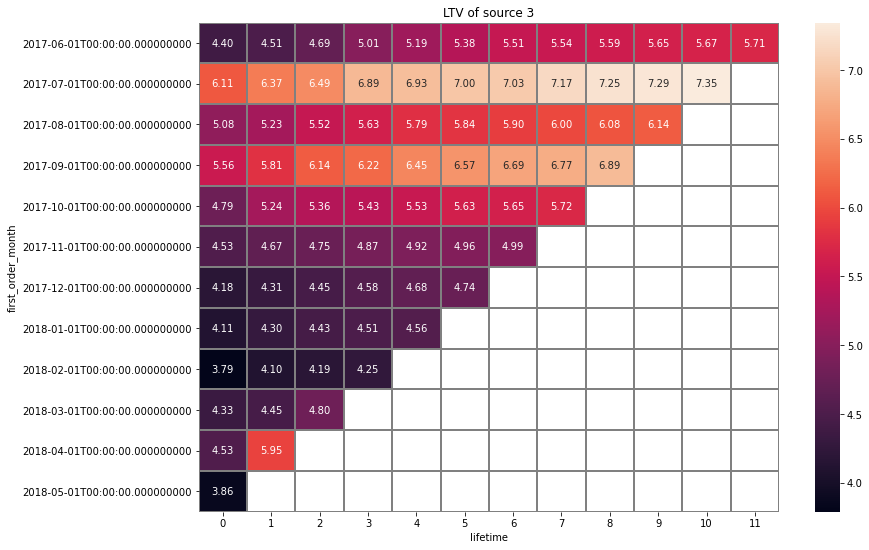

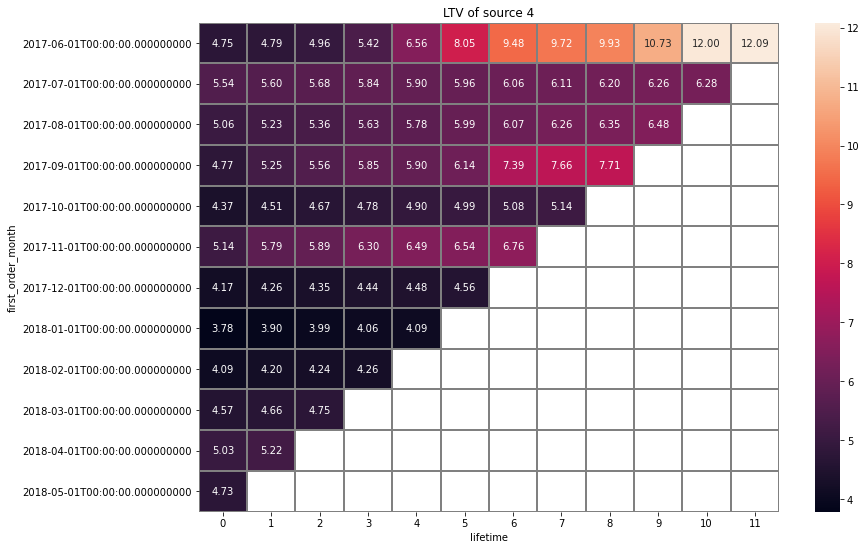

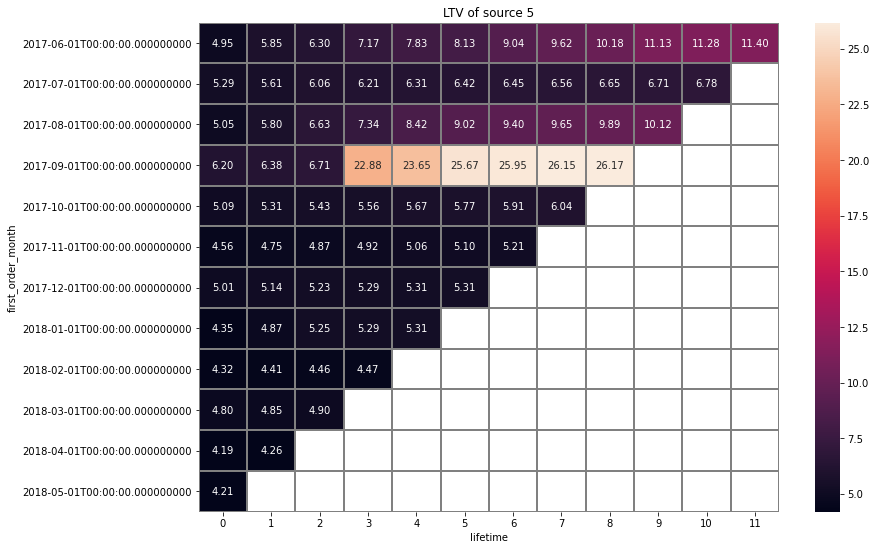

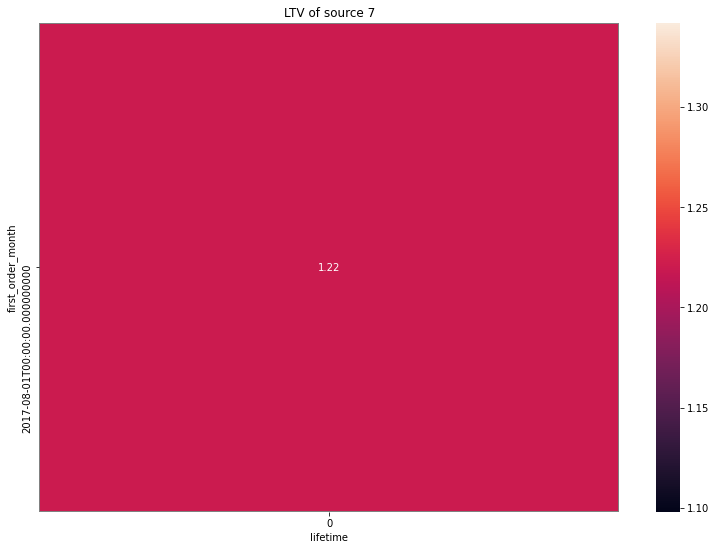

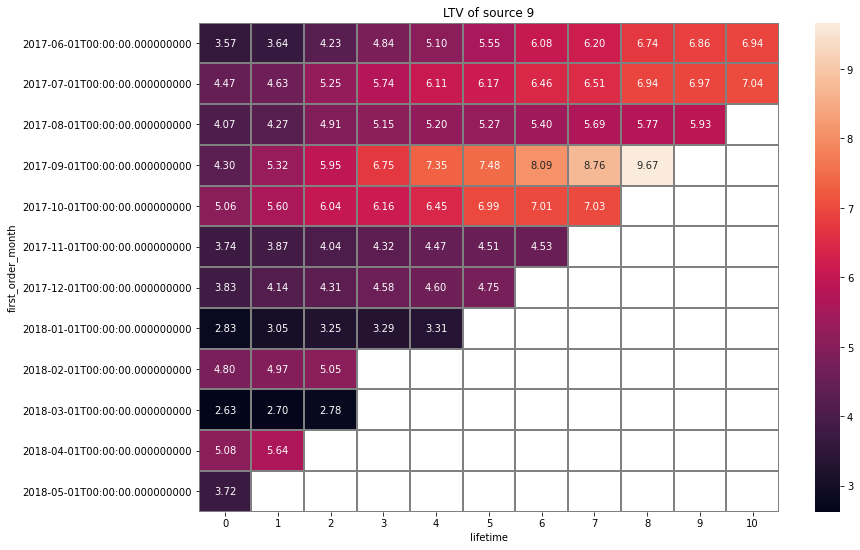

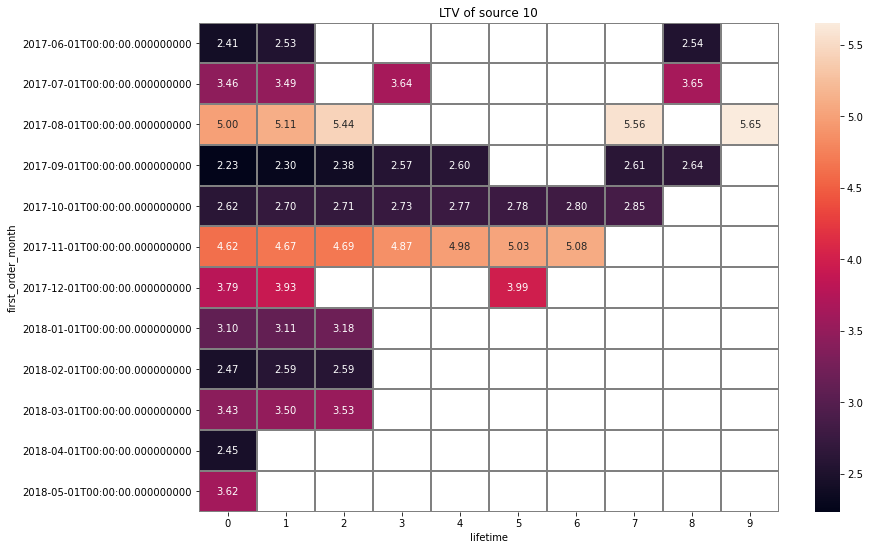

In [133]:
for i in sources_id:
    heatmap_for_source(i, orders)

There is no plot for the source #6. Let's take a look in old fashion way.

In [134]:
source_6 = orders[orders['source_id']==6]
source_6

,buy_ts,revenue,uid,source_id,first_visit_date,first_order_month,desktop,touch,first_order_date,first_visit,time_before_order,time_before_order_numeric,order_month


There is no data for #6. May be it's some kind of mistake or technical issue. The best we can do here is to let the other members of the team to know abou it.

#### Conclusion
Looks like not all the ad sources are the same. Number 6, 7 and 10 are not bringing much money.

## Marketing

### How much money was spent overall

In [135]:
costs_us.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [136]:
#stats
costs_us.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


In [137]:
#total expences
expences_total=costs_us['costs'].sum()
expences_total

329131.62

### Spending per source

In [138]:
expences_per_source=pd.DataFrame(costs_us.groupby('source_id')['costs'].sum())
expences_per_source.sort_values(by='costs')
expences_per_source

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


#### Spendings per month per source

In [139]:
costs_us['dt_month'] = costs_us['dt'].astype('datetime64[M]')
costs_per_month_per_source = costs_us.groupby(['source_id', 'dt_month']).sum().reset_index()

costs_per_month_per_source.head()

,source_id,dt_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


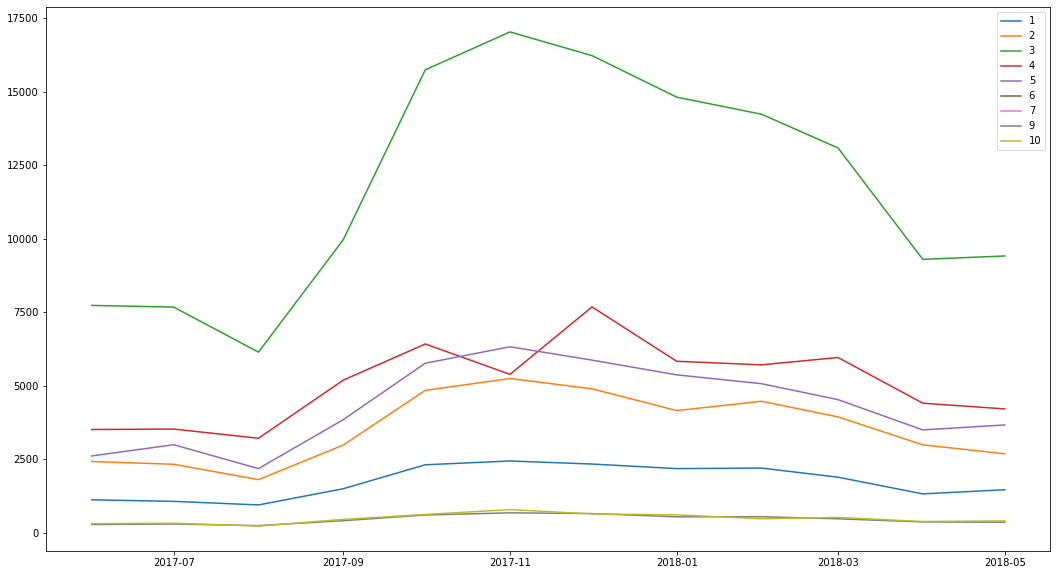

In [140]:
plt.rcParams["figure.figsize"] = (18,10)

for id in sources_id:
    costs_per_month_per_source_id = costs_per_month_per_source[costs_per_month_per_source['source_id'] == id]
    plt.plot(costs_per_month_per_source_id['dt_month'], costs_per_month_per_source_id['costs'], label=id)
    
plt.legend()
plt.show()

### How much money was spent overtime

In [141]:
costs_overtime=costs_us.groupby('dt')['costs'].sum()
costs_overtime.head()

dt
2017-06-01    735.26
2017-06-02    721.19
2017-06-03    450.85
2017-06-04    761.16
2017-06-05    821.44
Name: costs, dtype: float64

In [142]:
costs_us['dt_month']=costs_us['dt'].astype('datetime64[M]')
costs_us.head()

,source_id,dt,costs,dt_month
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-01
2,1,2017-06-03,36.53,2017-06-01
3,1,2017-06-04,55.00,2017-06-01
4,1,2017-06-05,57.08,2017-06-01


In [143]:
costs_per_month=costs_us.groupby('dt_month')['costs'].sum()
costs_per_month

dt_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

In [144]:
costs_per_source_by_months=costs_us.groupby(['dt_month', 'source_id'])['costs'].sum().reset_index()
costs_per_source_by_months.head()

,dt_month,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


<AxesSubplot:xlabel='dt_month', ylabel='costs'>

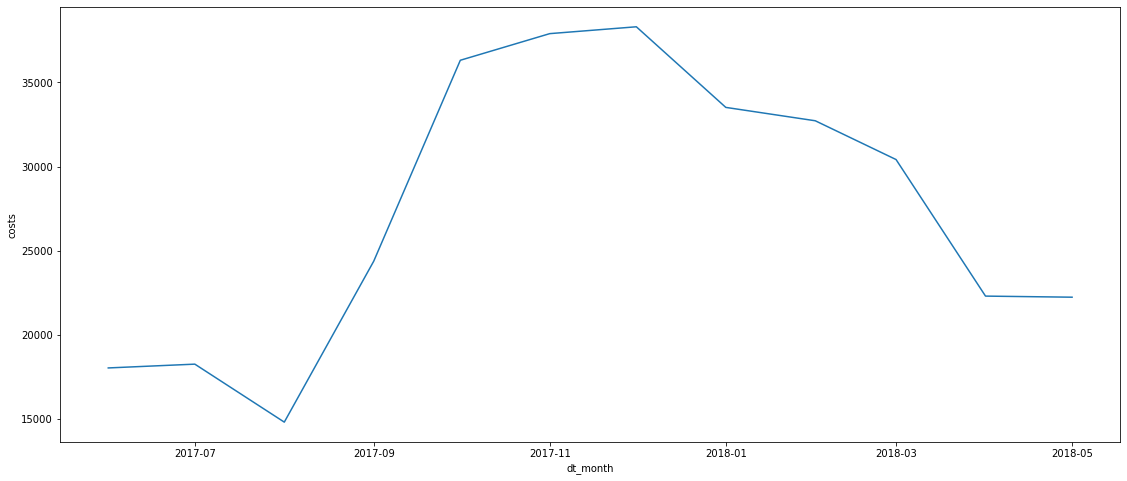

In [145]:
plt.figure(figsize=(19,8))
sns.lineplot(data=costs_per_month)

### Customer acquisition (CAC)

CAC = costs/number of buyers, so lets prepare our df for calculations

Let's take a look at the data that we have. Infomation about orders, visits, LTV and costs splitted between dataframes. We have to accumulate it.

In [146]:
#work with data format
orders['dt']=orders['buy_ts'].dt.date
orders['dt']=pd.to_datetime(orders['dt'], format="%Y-%m-%d")
#check the result
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50414 entries, 0 to 50413
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   buy_ts                     50414 non-null  datetime64[ns] 
 1   revenue                    50414 non-null  float64        
 2   uid                        50414 non-null  uint64         
 3   source_id                  50414 non-null  int64          
 4   first_visit_date           50414 non-null  datetime64[ns] 
 5   first_order_month          50414 non-null  datetime64[ns] 
 6   desktop                    50414 non-null  bool           
 7   touch                      50414 non-null  bool           
 8   first_order_date           50414 non-null  datetime64[ns] 
 9   first_visit                50414 non-null  datetime64[ns] 
 10  time_before_order          50414 non-null  timedelta64[ns]
 11  time_before_order_numeric  50414 non-null  int64      

In [147]:
#group the dataftrame to get revenue and number of orders
sales_per_day=orders.groupby(['dt','source_id'])['revenue'].agg(revenue='sum', orders_count='count')
sales_per_day.name='buyers'
sales_per_day.dt = 'date'
sales_per_day.sample()

,,revenue,orders_count
dt,source_id,,
2017-08-04,5,43.25,6


In [148]:
sales_per_day=sales_per_day.reset_index()
sales_per_day.head()

,dt,source_id,revenue,orders_count
0,2017-06-01,1,170.27,17
1,2017-06-01,2,21.01,13
2,2017-06-01,3,104.51,33
3,2017-06-01,4,37.22,11
4,2017-06-01,5,43.07,17


In [149]:
#accumulate costs and revenue in one dataframe
sales_per_day=sales_per_day.merge(costs_us, on=['dt','source_id'], how='right', right_index=False)
sales_per_day.head()

,dt,source_id,revenue,orders_count,costs,dt_month
0,2017-06-01,1,170.27,17.0,75.20,2017-06-01
1,2017-06-02,1,61.90,9.0,62.25,2017-06-01
2,2017-06-03,1,24.71,11.0,36.53,2017-06-01
3,2017-06-04,1,24.65,5.0,55.00,2017-06-01
4,2017-06-05,1,74.83,26.0,57.08,2017-06-01


In [150]:
#calculate CAC per day
sales_per_day['cac']=sales_per_day['costs']/sales_per_day['orders_count']
sales_per_day.head()

,dt,source_id,revenue,orders_count,costs,dt_month,cac
0,2017-06-01,1,170.27,17.0,75.20,2017-06-01,4.423529
1,2017-06-02,1,61.90,9.0,62.25,2017-06-01,6.916667
2,2017-06-03,1,24.71,11.0,36.53,2017-06-01,3.320909
3,2017-06-04,1,24.65,5.0,55.00,2017-06-01,11.000000
4,2017-06-05,1,74.83,26.0,57.08,2017-06-01,2.195385


In [151]:
total_mean_cac=sales_per_day['cac'].mean() 
total_mean_cac

6.929336196180733

In [152]:
first_orders_per_month = orders.groupby('first_order_month')['uid'].nunique()
first_orders_per_month

first_order_month
2017-06-01    2023
2017-07-01    1923
2017-08-01    1370
2017-09-01    2581
2017-10-01    4340
2017-11-01    4081
2017-12-01    4383
2018-01-01    3373
2018-02-01    3651
2018-03-01    3533
2018-04-01    2276
2018-05-01    2988
Name: uid, dtype: int64

In [153]:
costs_per_month = costs_us.groupby('dt_month')['costs'].sum().reset_index()
cac_per_month = costs_per_month.merge(first_orders_per_month, left_on="dt_month", right_on="first_order_month")
cac_per_month.columns = ['cohort', 'costs', 'orders']
cac_per_month['cac'] = cac_per_month['costs'] /  cac_per_month['orders']
cac_per_month

,cohort,costs,orders,cac
0,2017-06-01,18015.00,2023,8.905091
1,2017-07-01,18240.59,1923,9.485486
2,2017-08-01,14790.54,1370,10.796015
3,2017-09-01,24368.91,2581,9.441654
4,2017-10-01,36322.88,4340,8.369327
5,2017-11-01,37907.88,4081,9.288870
6,2017-12-01,38315.35,4383,8.741809
7,2018-01-01,33518.52,3373,9.937302
8,2018-02-01,32723.03,3651,8.962758
9,2018-03-01,30415.27,3533,8.608907


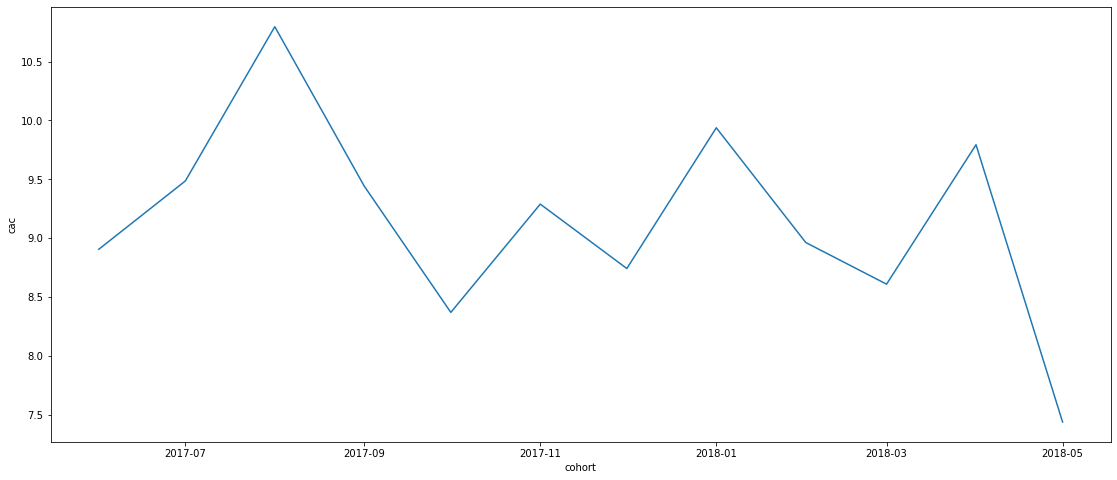

In [154]:
plt.figure(figsize=(19,8))
sns.lineplot(data=cac_per_month['cac'], x=cac_per_month['cohort'], y=cac_per_month['cac'])
plt.show()

#### CAC for different sources

In [155]:
#mean CAC per source
cac_source_mean=sales_per_day.groupby('source_id')['cac'].mean()
cac_source_mean.sort_values()

source_id
9      4.786709
1      4.908409
10     5.710732
4      5.941721
5      6.113527
2      8.456133
3     12.281569
Name: cac, dtype: float64

In [156]:
#total CAC per source
cac_source=sales_per_day.groupby('source_id')['cac'].sum()
cac_source.sort_values()

source_id
9     1589.187479
1     1781.752480
10    1867.409294
4     2150.902829
5     2219.210469
2     3069.576294
3     4458.209569
Name: cac, dtype: float64

### CAC per source per month

In [157]:
costs_per_month_per_source.head()

,source_id,dt_month,costs
0,1,2017-06-01,1125.61
1,1,2017-07-01,1072.88
2,1,2017-08-01,951.81
3,1,2017-09-01,1502.01
4,1,2017-10-01,2315.75


In [158]:
customers_per_month_per_source = orders.groupby(['source_id', 'first_order_month']).agg({'uid': 'nunique'}).reset_index()
customers_per_month_per_source.columns=['source_id', 'cohort', 'customers']
customers_per_month_per_source.head()

,source_id,cohort,customers
0,1,2017-06-01,190
1,1,2017-07-01,160
2,1,2017-08-01,113
3,1,2017-09-01,227
4,1,2017-10-01,340


In [159]:
monthly_cac_per_source = customers_per_month_per_source.merge(costs_per_month_per_source, left_on=['source_id', 'cohort'], right_on=['source_id', 'dt_month'])
monthly_cac_per_source = monthly_cac_per_source.drop('cohort', 1)
monthly_cac_per_source['cac'] = monthly_cac_per_source['costs'] / monthly_cac_per_source['customers']
monthly_cac_per_source.head()

,source_id,customers,dt_month,costs,cac
0,1,190,2017-06-01,1125.61,5.924263
1,1,160,2017-07-01,1072.88,6.705500
2,1,113,2017-08-01,951.81,8.423097
3,1,227,2017-09-01,1502.01,6.616784
4,1,340,2017-10-01,2315.75,6.811029


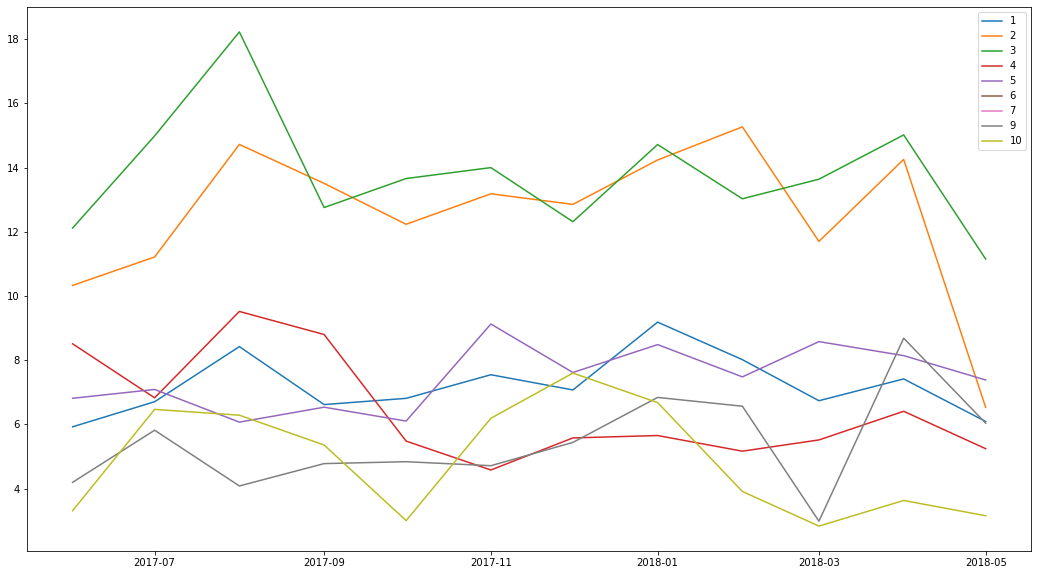

In [160]:
for id in sources_id:
    cac_per_month = monthly_cac_per_source[monthly_cac_per_source['source_id'] == id]
    plt.plot(cac_per_month['dt_month'], cac_per_month['cac'], label=id)

plt.legend()
plt.show()

#### CAC for cohorts

In [161]:
#calculate the costs for each cohort and source
monthly_cac_per_source.sample(5)

,source_id,customers,dt_month,costs,cac
58,5,430,2018-04-01,3501.15,8.142209
42,4,1377,2017-12-01,7680.47,5.577683
39,4,590,2017-09-01,5192.26,8.800441
65,9,145,2017-11-01,683.18,4.711586
18,2,381,2017-12-01,4897.80,12.855118


In [162]:
#add costs to the df with LTV
orders_costs=orders_grouped_by_cohorts_and_source.merge(monthly_cac_per_source, left_on=['cohort', 'source_id'], right_on=['dt_month', 'source_id'], how='left')
orders_costs.head()

,source_id,cohort,month,revenue,orders_count,lifetime,cohort_size,cumulative_revenue,customers,dt_month,costs,cac
0,1,2017-06-01,2017-06-01,1378.70,190,0,190,1378.70,190.0,2017-06-01,1125.61,5.924263
1,1,2017-06-01,2017-07-01,414.98,16,1,190,1793.68,190.0,2017-06-01,1125.61,5.924263
2,1,2017-06-01,2017-08-01,419.43,10,2,190,2213.11,190.0,2017-06-01,1125.61,5.924263
3,1,2017-06-01,2017-09-01,714.24,9,3,190,2927.35,190.0,2017-06-01,1125.61,5.924263
4,1,2017-06-01,2017-10-01,811.20,12,4,190,3738.55,190.0,2017-06-01,1125.61,5.924263


In [163]:
#calculate CAC
orders_costs['cac']=orders_costs['costs']/orders_costs['cohort_size']
orders_costs.head()

,source_id,cohort,month,revenue,orders_count,lifetime,cohort_size,cumulative_revenue,customers,dt_month,costs,cac
0,1,2017-06-01,2017-06-01,1378.70,190,0,190,1378.70,190.0,2017-06-01,1125.61,5.924263
1,1,2017-06-01,2017-07-01,414.98,16,1,190,1793.68,190.0,2017-06-01,1125.61,5.924263
2,1,2017-06-01,2017-08-01,419.43,10,2,190,2213.11,190.0,2017-06-01,1125.61,5.924263
3,1,2017-06-01,2017-09-01,714.24,9,3,190,2927.35,190.0,2017-06-01,1125.61,5.924263
4,1,2017-06-01,2017-10-01,811.20,12,4,190,3738.55,190.0,2017-06-01,1125.61,5.924263


### ROMI

In [164]:
#Calculate ROMI (as we don't have any data with other expencies than marketing and cant calculate ROI)
orders_costs['ltv']=orders_costs['cumulative_revenue']/orders_costs['cohort_size']
orders_costs['romi']=orders_costs['ltv']/orders_costs['cac']
orders_costs.head()

,source_id,cohort,month,revenue,orders_count,lifetime,cohort_size,cumulative_revenue,customers,dt_month,costs,cac,ltv,romi
0,1,2017-06-01,2017-06-01,1378.70,190,0,190,1378.70,190.0,2017-06-01,1125.61,5.924263,7.256316,1.224847
1,1,2017-06-01,2017-07-01,414.98,16,1,190,1793.68,190.0,2017-06-01,1125.61,5.924263,9.440421,1.593518
2,1,2017-06-01,2017-08-01,419.43,10,2,190,2213.11,190.0,2017-06-01,1125.61,5.924263,11.647947,1.966143
3,1,2017-06-01,2017-09-01,714.24,9,3,190,2927.35,190.0,2017-06-01,1125.61,5.924263,15.407105,2.600679
4,1,2017-06-01,2017-10-01,811.20,12,4,190,3738.55,190.0,2017-06-01,1125.61,5.924263,19.676579,3.321355


In [165]:
romi_for_cohorts=orders_costs.pivot_table(index='cohort', columns='lifetime', values='romi', aggfunc='mean')
romi_for_cohorts.cumsum(axis=1).round(2) 

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06-01,0.70,1.48,2.38,3.47,4.76,6.18,7.77,9.48,11.16,13.1,15.13,17.3
2017-07-01,0.73,1.51,2.49,3.47,4.57,5.69,6.84,8.02,9.15,10.4,11.68,NaN
2017-08-01,0.67,1.41,2.21,3.07,3.98,4.94,5.92,6.96,8.08,9.2,NaN,NaN
2017-09-01,0.68,1.53,2.46,3.80,5.20,6.83,8.56,10.15,11.79,NaN,NaN,NaN
2017-10-01,0.77,1.63,2.52,3.44,4.38,5.35,6.33,7.33,NaN,NaN,NaN,NaN
2017-11-01,0.71,1.48,2.28,3.13,4.00,4.88,5.78,NaN,NaN,NaN,NaN,NaN
2017-12-01,0.61,1.26,2.08,3.06,4.08,5.07,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,0.47,0.97,1.50,2.07,2.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,0.57,1.17,1.79,2.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


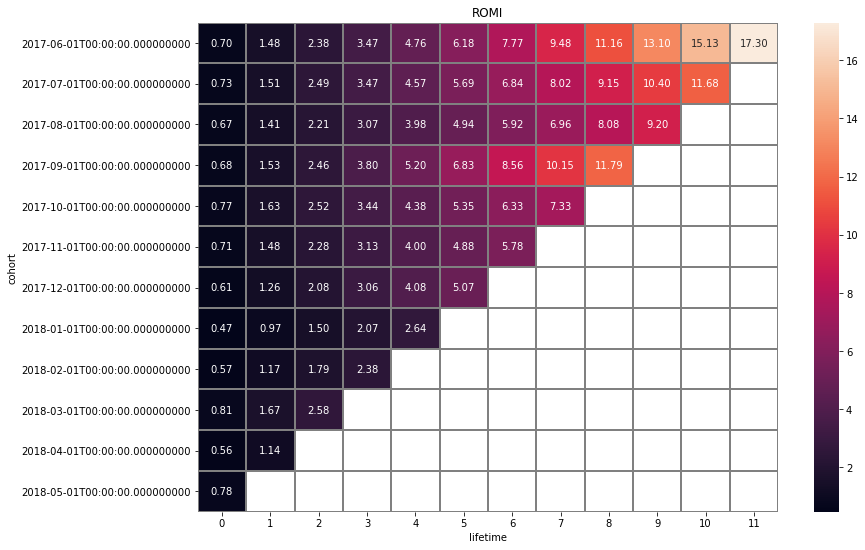

In [166]:
plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(
    romi_for_cohorts.cumsum(axis=1).round(2),
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

In [167]:
romi_for_cohorts.cumsum(axis=1).mean(axis=0) 

lifetime
0      0.671704
1      1.386657
2      2.229050
3      3.097858
4      4.201827
5      5.563295
6      6.867109
7      8.388622
8     10.044741
9     10.898793
10    13.403422
11    17.296838
dtype: float64

#### Conclusion
The longer cohort lives the higher ROMI is. Most of the cohorts will pays off on the second month, so we should not stop advertizing. 

### Perspective sources

In [168]:
#We'll take first cohort and calculate ROMI per source to identify perspective sources
revenue_per_source_1st_cohort = orders[orders['first_order_month']== '2017-06-01'].groupby('source_id').agg({'revenue': 'sum'}).reset_index()
revenue_per_source_1st_cohort

,source_id,revenue
0,1,6392.39
1,2,3915.26
2,3,3640.32
3,4,4992.67
4,5,4377.64
5,9,472.15
6,10,241.26


In [169]:
costs_1st_cohort = orders_costs[orders_costs['cohort']== '2017-06-01']
costs_1st_cohort.head()

,source_id,cohort,month,revenue,orders_count,lifetime,cohort_size,cumulative_revenue,customers,dt_month,costs,cac,ltv,romi
0,1,2017-06-01,2017-06-01,1378.70,190,0,190,1378.70,190.0,2017-06-01,1125.61,5.924263,7.256316,1.224847
1,1,2017-06-01,2017-07-01,414.98,16,1,190,1793.68,190.0,2017-06-01,1125.61,5.924263,9.440421,1.593518
2,1,2017-06-01,2017-08-01,419.43,10,2,190,2213.11,190.0,2017-06-01,1125.61,5.924263,11.647947,1.966143
3,1,2017-06-01,2017-09-01,714.24,9,3,190,2927.35,190.0,2017-06-01,1125.61,5.924263,15.407105,2.600679
4,1,2017-06-01,2017-10-01,811.20,12,4,190,3738.55,190.0,2017-06-01,1125.61,5.924263,19.676579,3.321355


### Monthly ROMI heatmap per source

In [170]:
sales_per_day.sample(3)

,dt,source_id,revenue,orders_count,costs,dt_month,cac
107,2017-09-16,1,34.46,10.0,30.24,2017-09-01,3.024000
748,2017-06-23,3,118.31,19.0,225.21,2017-06-01,11.853158
1489,2017-07-08,5,45.16,10.0,56.80,2017-07-01,5.680000


In [172]:
costs_per_month = sales_per_day.groupby(['dt_month', 'source_id']).agg({ 'costs': 'sum'}).reset_index()
costs_per_month.columns = ['cohort', 'source_id', 'costs']
costs_per_month.head()

,cohort,source_id,costs
0,2017-06-01,1,1125.61
1,2017-06-01,2,2427.38
2,2017-06-01,3,7731.65
3,2017-06-01,4,3514.80
4,2017-06-01,5,2616.12


In [173]:
sales_per_cohort_per_month = orders.groupby(['source_id', 'first_order_month', 'order_month']).agg({'revenue': 'sum', 'uid': 'nunique'}).reset_index()
sales_per_cohort_per_month.columns=['source_id','cohort','order_month','revenue','orders_count']
sales_per_cohort_per_month.head()

,source_id,cohort,order_month,revenue,orders_count
0,1,2017-06-01,2017-06-01,1378.70,190
1,1,2017-06-01,2017-07-01,414.98,16
2,1,2017-06-01,2017-08-01,419.43,10
3,1,2017-06-01,2017-09-01,714.24,9
4,1,2017-06-01,2017-10-01,811.20,12


In [174]:
sales_with_costs_per_cohort_per_month = sales_per_cohort_per_month.merge(costs_per_month, on=['cohort','source_id'], how="left")
sales_with_costs_per_cohort_per_month.head()

,source_id,cohort,order_month,revenue,orders_count,costs
0,1,2017-06-01,2017-06-01,1378.70,190,1125.61
1,1,2017-06-01,2017-07-01,414.98,16,1125.61
2,1,2017-06-01,2017-08-01,419.43,10,1125.61
3,1,2017-06-01,2017-09-01,714.24,9,1125.61
4,1,2017-06-01,2017-10-01,811.20,12,1125.61


In [175]:
#lifetime
sales_with_costs_per_cohort_per_month['lifetime']=(
    sales_with_costs_per_cohort_per_month['order_month']-sales_with_costs_per_cohort_per_month['cohort'])
sales_with_costs_per_cohort_per_month['lifetime']=sales_with_costs_per_cohort_per_month['lifetime']/np.timedelta64(1, 'M')
sales_with_costs_per_cohort_per_month['lifetime']=sales_with_costs_per_cohort_per_month['lifetime'].round().astype('int')
sales_with_costs_per_cohort_per_month.head()

,source_id,cohort,order_month,revenue,orders_count,costs,lifetime
0,1,2017-06-01,2017-06-01,1378.70,190,1125.61,0
1,1,2017-06-01,2017-07-01,414.98,16,1125.61,1
2,1,2017-06-01,2017-08-01,419.43,10,1125.61,2
3,1,2017-06-01,2017-09-01,714.24,9,1125.61,3
4,1,2017-06-01,2017-10-01,811.20,12,1125.61,4


In [176]:
#cumulative_revenue
sales_with_costs_per_cohort_per_month['cumulative_revenue'] = sales_with_costs_per_cohort_per_month.groupby(
    ['source_id', 'cohort'])['revenue'].cumsum().reset_index()['revenue']
sales_with_costs_per_cohort_per_month.head()

,source_id,cohort,order_month,revenue,orders_count,costs,lifetime,cumulative_revenue
0,1,2017-06-01,2017-06-01,1378.70,190,1125.61,0,1378.70
1,1,2017-06-01,2017-07-01,414.98,16,1125.61,1,1793.68
2,1,2017-06-01,2017-08-01,419.43,10,1125.61,2,2213.11
3,1,2017-06-01,2017-09-01,714.24,9,1125.61,3,2927.35
4,1,2017-06-01,2017-10-01,811.20,12,1125.61,4,3738.55


In [178]:
#romi
sales_with_costs_per_cohort_per_month['romi'] = sales_with_costs_per_cohort_per_month['cumulative_revenue'] / sales_with_costs_per_cohort_per_month['costs']
#check the result to make sure everything works as it supposed
sales_with_costs_per_cohort_per_month[sales_with_costs_per_cohort_per_month['source_id'] == 3].sample(3)

,source_id,cohort,order_month,revenue,orders_count,costs,lifetime,cumulative_revenue,romi
183,3,2017-08-01,2017-12-01,54.61,6,6143.54,4,1951.36,0.317628
205,3,2017-10-01,2018-05-01,84.65,20,15737.24,7,6589.65,0.418730
211,3,2017-11-01,2018-04-01,38.50,10,17025.34,5,6027.29,0.354019


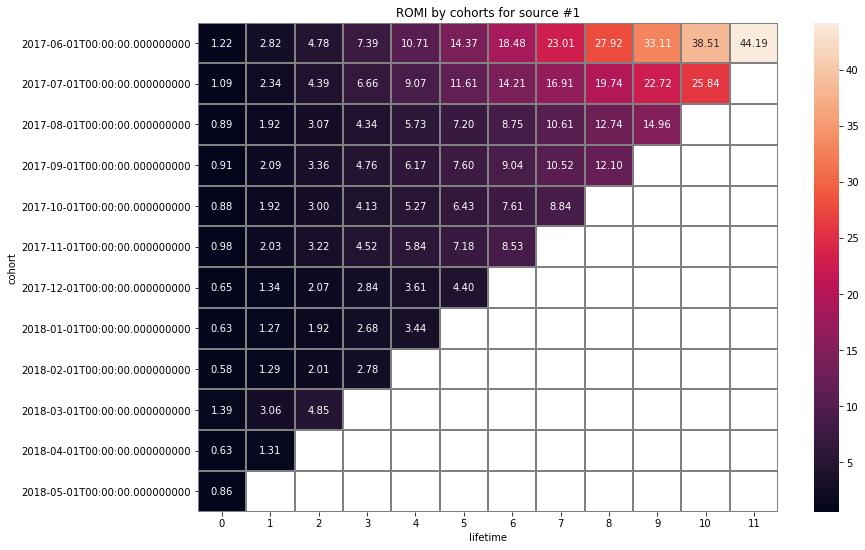

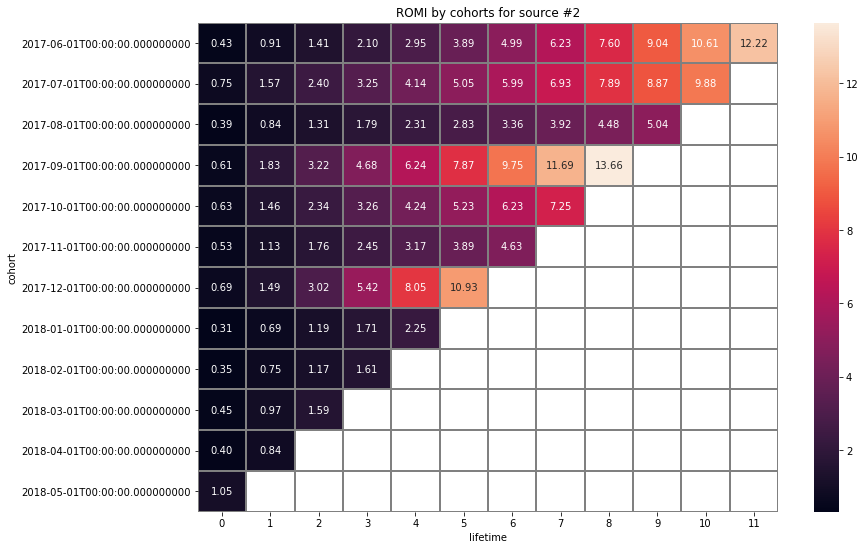

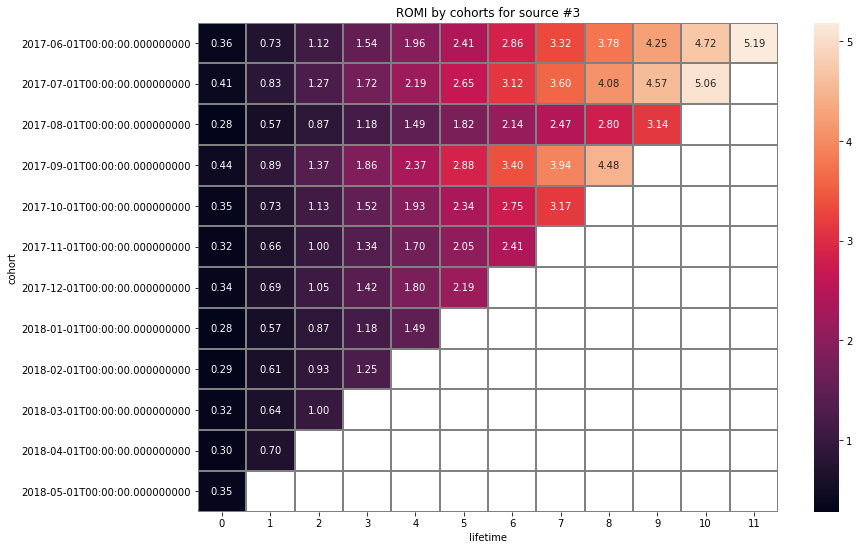

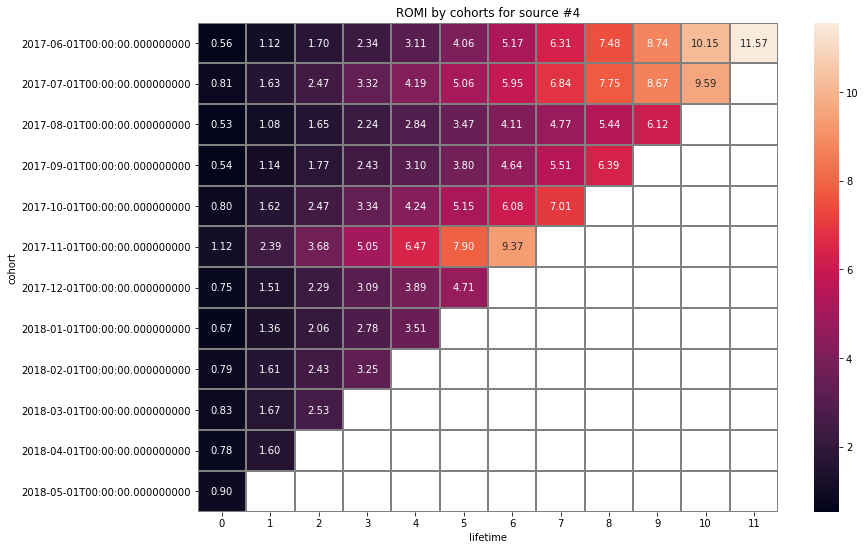

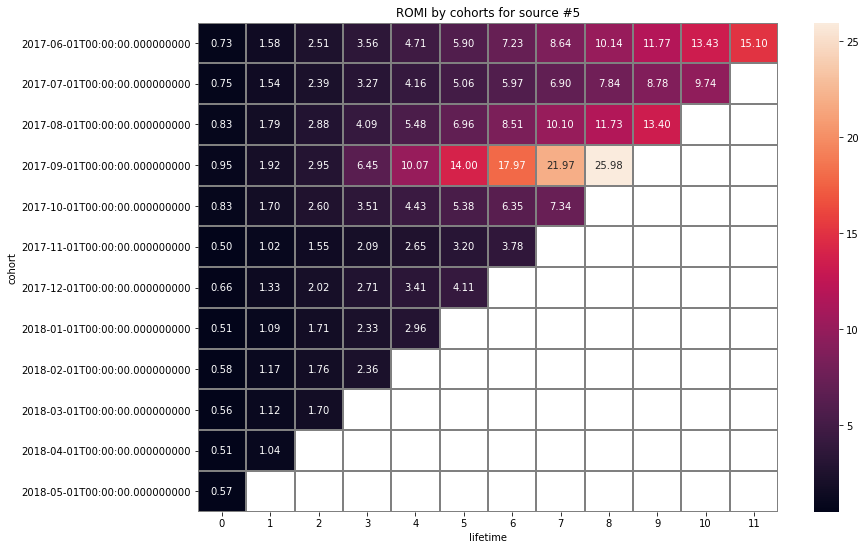

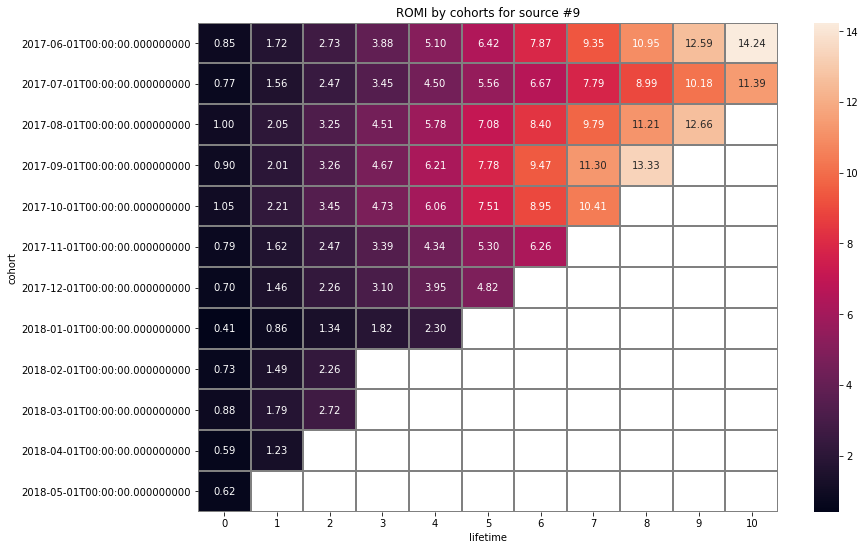

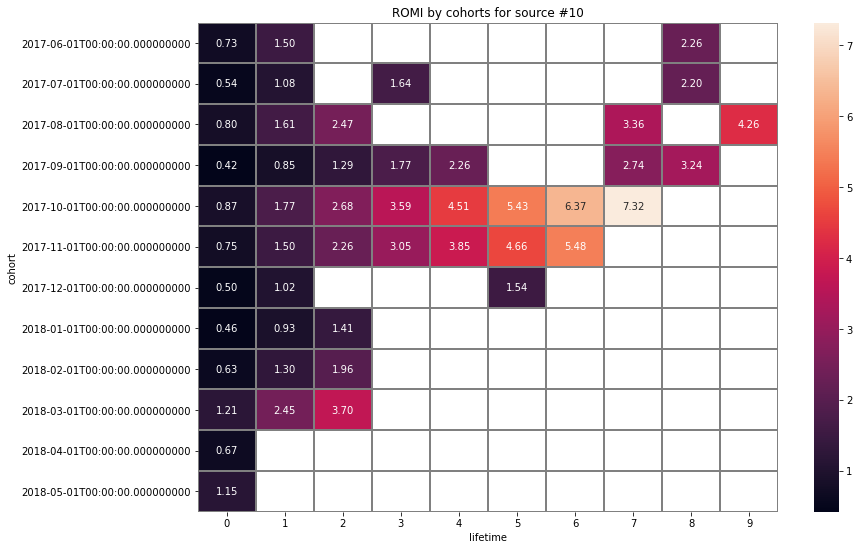

In [179]:
def romi_heatmap_per_source (i, df):
    orders_costs_per_source_i = df[df['source_id']==i]
    romi_for_source=orders_costs_per_source_i.pivot_table(index='cohort', columns='lifetime', values='romi', aggfunc='mean')
    romi_for_source.cumsum(axis=1).round(2)
    report_len = len(romi_for_source)
    if report_len > 0:
        plt.figure(figsize=(13, 9))
        plt.title('ROMI by cohorts for source #{}'.format(i))
        sns.heatmap(
            romi_for_source.cumsum(axis=1).round(2),
            annot=True,
            fmt='.2f',
            linewidths=1,
            linecolor='gray',
        ) 
        plt.show()


for id in sources_id:
    romi_heatmap_per_source(id, sales_with_costs_per_cohort_per_month)

#### Conclusion
The most profitable sources are #1,2,5,9 (decsending order).

## General conclusion

We've studied the given tables and prepared it for analysys.

### Describing of the product

*Number of users*
- 6825.91 users use service per month from touchscreens and 16724.91 use service per month from desktops. 
- 1634.92 users use service per week from touchscreens and 4129.50 users use service per week from desktops. 
- 252.87 users use service per day from touchscreens and 659.244 users use service per day from desktop.
- 6825.91 users use service per month from touchscreens and 16724.91 use service per month from desktops. 
- 1634.92 users use service per week from touchscreens and 4129.50 users use service per week from desktops. 
- 252.87 users use service per day from touchscreens and 659.244 users use service per day from desktop.

*Number of users per each source*

- Monthly:
1. 6 source	1.000000
2. 7 source	2.833333
3. 10 source	707.000000
4. 9 source	987.000000
5. 1 source	1818.750000
6. 2 source	2752.083333
7. 5 source	5017.916667
8. 3 source	6758.833333
9. 4 source	7765.666667

- Weekly:
1. 6 source	1.000000
2. 7 source	1.333333
3. 10 source	166.547170
4. 9 source 238.698113
5. 1 source	463.490566
6. 2 source	715.716981
7. 5 source	1167.471698
8. 3 source	1565.943396
9. 4 source	1829.283019

- Daily:
2. 1. 6 source	1.000000
3. 7 source	1.058824
4. 10 source	26.033058
5. 9 source	36.110193
6. 1 source	80.557692
7. 2 source	120.707989
8. 5 source	175.622590
9. 4 source	275.454545

*Sessions*

- In average users spent on a platform 643.51 seconds.
- Average session duration for users with touchscreens - 479.62.
- Average session duration for users with desktops - 703.95.

- Average session duration for each source:

1. 1 source 1039.3611558864043
2. 2 source 844.7173182715323
3. 3 source 573.2837051746292
4. 4 source 559.8410417116922
5. 5 source 526.7421866826097
6. 6 source 1370.0
7. 7 source 606.6666666666666
8. 9 source 572.5434962717482
9. 10 source 662.4438902743142

- Almost 16% percent of users come back weekly and almost 4% come back weekly. 

- Source MAU (in acsending order)
6.	1.000000
7.	2.833333
10.	707.000000
9.	987.000000
1.	1818.750000
2.	2752.083333
5.	5017.916667
3.	6758.833333
4.	7765.666667


- Source WAU (in acsending order)
6.	1.000000
7.	1.333333
10.	166.547170
9.	238.698113
1.	463.490566
2.	715.716981
5.	1167.471698
3.	1565.943396
4.	1829.283019

- Source DAU (in acsending order)
6.	1.000000
7.	1.058824
10.	26.033058
9.	36.110193
1.	80.557692
2.	120.707989
5.	175.622590
3.	232.865014
4.	275.454545

The most "sticky" sources are #5,3,4, wich means that users form this sources tends to come back more often then from the oher sources.

### Sales
Average session length is 643 minutes. Most of the users spent on the site about 840 minutes. There is a outliers - users whose sessions are extremely long. May be they just didn't close a tab, may be they forgot it's open.

In average time before the order is 25368 min, but thats because of the outliers. Most users make decisions much faster. 75% of them needs 6231 min to make an order.

In [183]:
print("Orders  per month",'\n',
    orders_per_month.sort_values(by='order_quantity'),'\n', '\n',
      "Revenue per month", '\n',orders_per_month.sort_values(by='revenue'))

Orders  per month 
    order_month   revenue  order_quantity
2   2017-08-01   8758.78            1472
1   2017-07-01  12539.47            1984
0   2017-06-01   9557.49            2023
10  2018-04-01  16858.06            2744
3   2017-09-01  18345.51            2750
11  2018-05-01  20735.98            3544
7   2018-01-01  19417.13            3898
9   2018-03-01  28834.59            4181
8   2018-02-01  25560.54            4258
5   2017-11-01  27069.93            4547
4   2017-10-01  27987.70            4675
6   2017-12-01  36388.60            4942 
 
 Revenue per month 
    order_month   revenue  order_quantity
2   2017-08-01   8758.78            1472
0   2017-06-01   9557.49            2023
1   2017-07-01  12539.47            1984
10  2018-04-01  16858.06            2744
3   2017-09-01  18345.51            2750
7   2018-01-01  19417.13            3898
11  2018-05-01  20735.98            3544
8   2018-02-01  25560.54            4258
5   2017-11-01  27069.93            4547
4   2017-10-0

hot. Pretty much the same with the number of orders - the top5 monthes are the same. 

#### Purchases

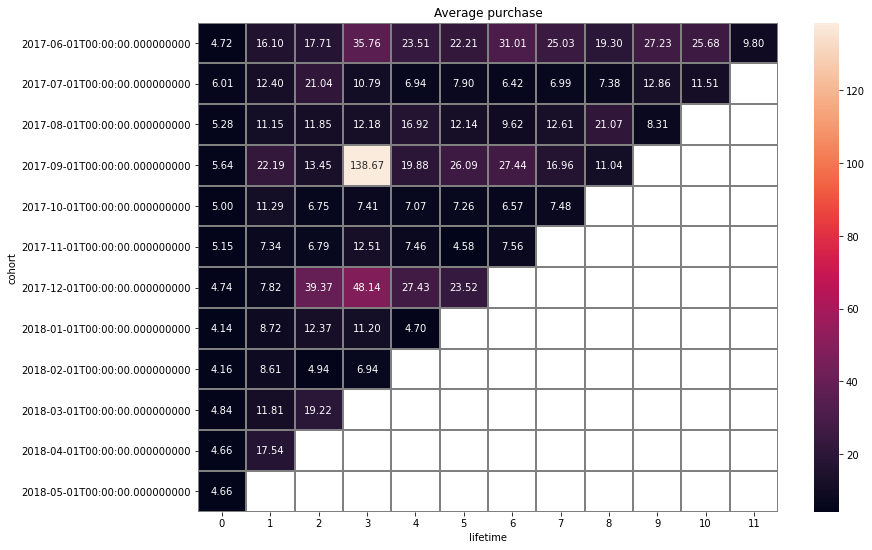

In [184]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('Average purchase')
sns.heatmap(
    revenue_per_user_per_month,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

The average purchase is almost 5$ in total. But in general the longer cohort "lives" the bigger the purchase.

Something extremely good happened in December with the September cohort. It purchased the biggest amount of money - almost 140.

So far the June, September and December cohorts have the biggest average purchases. 

#### LTV

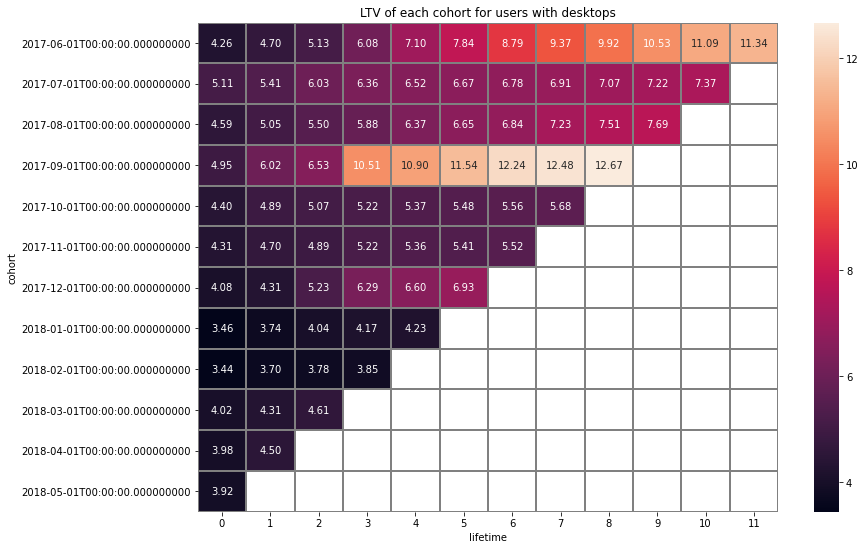

In [185]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('LTV of each cohort for users with desktops')
sns.heatmap(
    ltv_report_desktop,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

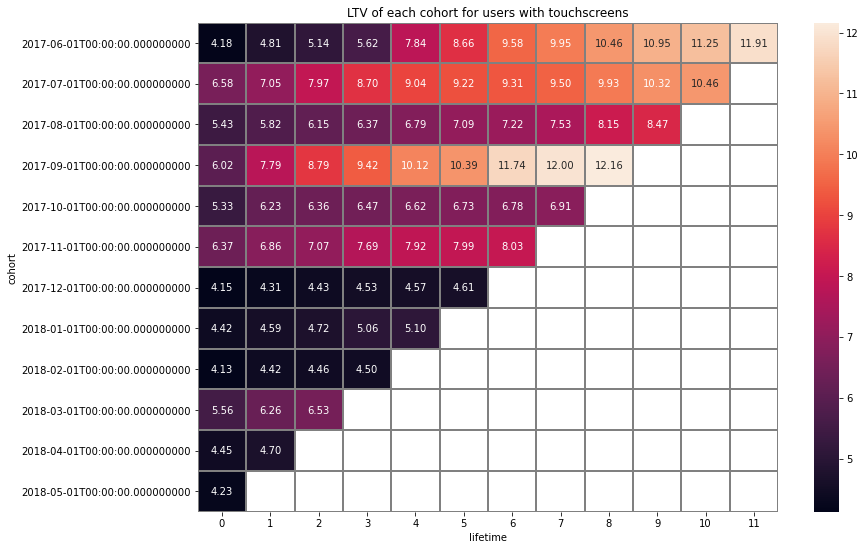

In [186]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('LTV of each cohort for users with touchscreens')
sns.heatmap(
    ltv_report_touch,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

There is a difference between purchases from desktops and touchscreens. Seems like desktop users pay more. Maybe, people make small simple orders from their phones. Like "Let's go to the movie right now" and not something like "next week our class is going to the theatre, we have to buy 30 tickets" or "I wanna go to the opera/famous singer/pop star next month and I wanna watch it from the best spot". And the touchscrenn guy seems to be more active in the autumn and late autumn.

### Investments

Total amount of marketing expencies is 329131.62.

In [189]:
print('Expences per source','\n','\n',expences_per_source.sort_values(by='costs').reset_index())

Expences per source 
 
    source_id      costs
0          9    5517.49
1         10    5822.49
2          1   20833.27
3          2   42806.04
4          5   51757.10
5          4   61073.60
6          3  141321.63


In [192]:
print('Costs per month','\n','\n',costs_per_month.head())

Costs per month 
 
       cohort  source_id    costs
0 2017-06-01          1  1125.61
1 2017-06-01          2  2427.38
2 2017-06-01          3  7731.65
3 2017-06-01          4  3514.80
4 2017-06-01          5  2616.12


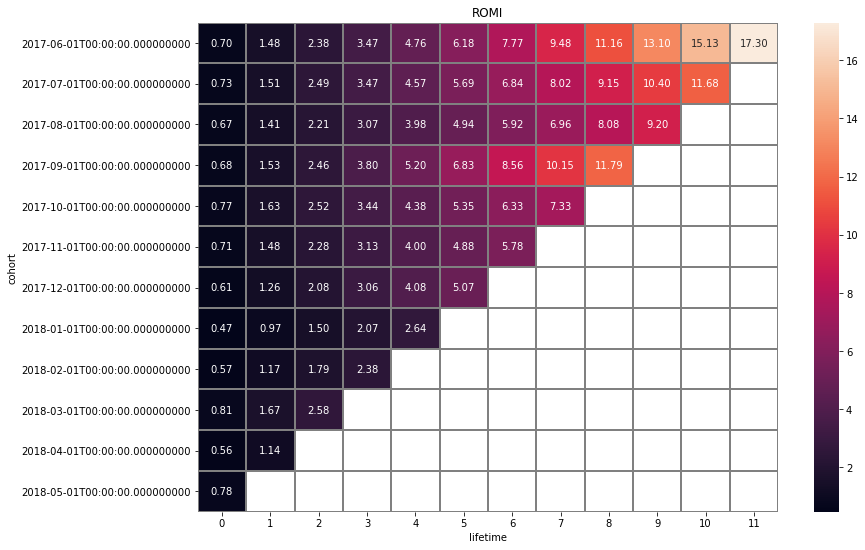

In [193]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13, 9))
plt.title('ROMI')
sns.heatmap(
    romi_for_cohorts.cumsum(axis=1).round(2),
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='gray',
) 
plt.show()

*Stats of the LTV for desktop users and touchcscreen users.*

In [194]:
print("LTV", '\n','\n',
    desktop_users_cohorts['ltv'].describe(), '\n','\n', "CAC", '\n','\n', touch_cohort_size['ltv'].describe())

LTV 
 
 count    78.000000
mean      6.270238
std       2.333737
min       3.443974
25%       4.598602
50%       5.511427
75%       7.034893
max      12.665382
Name: ltv, dtype: float64 
 
 CAC 
 
 count    78.000000
mean      7.166296
std       2.274364
min       4.125051
25%       5.109495
50%       6.783921
75%       8.764677
max      12.164907
Name: ltv, dtype: float64


Most of the sources generate enough revenue to pay off the marketing investments after 1st month.
The longer the cohort lives the higher ROMI is, so we should not stop advertising.
Customers come back and complete more purchases.

There's a difference between LTV for touchscreen and desktop users, and there's a tendency for the user to continue using the same device (only 5% of desktop users are sometimes using the system on the touchscreen device, and only 10% of the touchscreen users are sometimes using the desktop), therefore, marketing spendings should be focused more on the desktop. 

Clients from source #3 are the most expensive, and from source #9 and #1 - are the cheapest.

In [195]:
print('CAC per sources','\n',cac_source.sort_values())

CAC per sources 
 source_id
9     1589.187479
1     1781.752480
10    1867.409294
4     2150.902829
5     2219.210469
2     3069.576294
3     4458.209569
Name: cac, dtype: float64


In [196]:
costs_1st_cohort.groupby('source_id')['romi'].sum().sort_values()

source_id
10     2.262809
3      5.186554
4     11.571677
2     12.220588
9     14.244899
5     15.100561
1     44.187960
Name: romi, dtype: float64

Some sources are not paying off in the perspective of the year, they should be dropped: 3, 10.
And CAC for source #3 costs is the highest, but it's ROMI is really low. 

Some sources are paying off very well, spending on them should be increased as much as the source allows: 1.

Some sources are paying off but not generating as much ROMI as previous, spending should continue in the same way: 9, 5, 4, 3.
